# Machine Learning - Group Project - Group 10


**Authors:** Aathithyan pakkirisamy, Greeshma Saira Eapen, Hadia Fadlelmawla, Kaviarasi Duraimanickam, Logan Willans, Nikunj Vekariya, Payagala waduge Fernando, Prince Verma, Vahin Valliyur Sankar

#**Note:** To run this file, you will need a Kaggle.json file that has an API token from Kaggle. You will have to upload that token in the 2nd cell. Then the program will be able run. [click here to download](https://drive.google.com/file/d/1DxR-pfG8j7n0INhKo0dmvo64u6915CCn/view?usp=share_link)

#Executive Summary Report

##Abstract


The COVID-19 pandemic overwhelmed health systems across the world. The disease causes severe respiratory illness, often requiring patients to be admitted to the intensive care unit ("ICU"). This project analyzed data from Hospital Sírio-Libanês, a hospital in São Paulo, Brazil, and constructed three separate machine learning models to identify the most effective model in predicting whether a patient requires ICU admission.


##Methodology

This project is divided into four steps:

1. Exploratory Data Analysis ("EDA")
2. Data Preparation
3. Implement Machine Learning Models
4. AI Fairness 360 Toolkit ("AIF360") Implementation

**1. EDA:** We reviewed the dataset to gain a general understanding of its contents, as well as to formulate a plan for data preparation. We identified basic characteristics of the data, including the number of records, number of columns, data types, missing values, and any potential biases or imbalances within the dataset.

**2. Data Preparation:** We performed data cleaning techniques to prepare the dataset for model development. For example, we removed missing values, altered data types of several columns, and balanced the target variable, ICU admission. We implemented a novel algorithm to impute missing values. The algorithm combines strategies from next observation carried backward and last observation carried forward. This approach was chosen as the data is missing not at random ("MNAR"), and the original dataset includes a note that a patient with missing values is clinically stable, implying that data from the next or previous entry can be carried over into the missing window.

**3. Implement Machine Learning Models:** Determining whether a patient requires admission to the ICU is a binary classification problem. Accordingly, we selected machine learning models appropriate for binary classification: K-Nearest Neighbors, Random Forest, and Support Vector Machine. After reviewing and cleaning the data, we split it into training and test sets, then trained each model and evaluated its performance with the test dataset.

**4. AIF360:** AIF360 is an open-source toolkit developed by IBM to detect and mitigate bias and discrimination in machine learning projects. However, the applicability of AIF360 to this dataset is limited. The data were anonymized, and characteristics like gender and age, which are present in the dataset and might be considered 'bias' in other contexts, were deemed scientifically valid metrics for health data.

Despite these limitations, we tested AIF360 on our dataset to check for unnoticed biases, focusing on gender. Using a bias mitigation algorithm from sklearn, we observed changes in accuracy, F1 score, recall, precision, disparate impact, and accuracy for gender. This suggests that while AIF360 is important in machine learning, its use must be carefully considered, especially in medicine where factors like gender and age are crucial for accurate diagnosis and treatment. Overcorrecting for bias might reduce result accuracy.

##Findings
We identified Random Forest as the most effective model for predicting ICU admission based on health sign data. Health care professionals can leverage this work to carry out high-level organizational decisions, such as determining the number of staff, beds, ventilators, etc., needed, based on the health signs of COVID-19 patients.

# Step 1 - Exploratory Data Analysis
---

##Comprehensive Data Summary
Goals:
1. Identify data dimensions
2. Identify variable types
3. Provide summary statistics

In [ ]:
#pip install ydata-profiling
!pip install aif360
!pip install scikit-learn
!pip install -U imbalanced-learn
!pip install -q kaggle





     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.1/214.1 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 2.6 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


#Upload your Kaggle.json file here




In [ ]:
from google.colab import files
uploaded = files.upload()


Saving kaggle.json to kaggle.json


In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d "Sírio-Libanes/covid19"
!unzip -q covid19.zip -d ./covid19

  0% 0.00/858k [00:00<?, ?B/s]
100% 858k/858k [00:00<00:00, 120MB/s]


In [ ]:
# import analysis packages and read data from excel file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from google.colab import files
from imblearn.over_sampling import RandomOverSampler
from sklearn.pipeline import make_pipeline
from sklearn import svm
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report


'''# mount my Google Drive to this Colab session
from google.colab import drive
drive.mount('/content/drive')


# separate file paths depending on who runs the program. sharing access to the data is a bit tricky.
logan_path = '/content/drive/MyDrive/ML Group 10 HQ/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx'
teammate_path = '/content/drive//Shared with me/ML Group 10 HQ/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx'


# programmatically set data path depending on who is executing the program
if os.path.exists(logan_path):
    data_path = logan_path
elif os.path.exists(teammate_path):
    data_path = teammate_path
else:
    raise FileNotFoundError("The dataset file was not found in known paths.")'''

data_path = '/content/covid19/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx'
data = pd.read_excel(data_path)



# Set max column and row display (useful for debugging)
pd.set_option('display.max_columns', 250)
pd.set_option('display.max_rows', 1920)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.width', 0)

# display first several records
data.head(5)


PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65 AGE_PERCENTIL  GENDER  DISEASE GROUPING 1  DISEASE GROUPING 2  DISEASE GROUPING 3  DISEASE GROUPING 4  DISEASE GROUPING 5  DISEASE GROUPING 6  HTN  IMMUNOCOMPROMISED  OTHER  ALBUMIN_MEDIAN  ALBUMIN_MEAN  ALBUMIN_MIN  ALBUMIN_MAX  ALBUMIN_DIFF  BE_ARTERIAL_MEDIAN  BE_ARTERIAL_MEAN  BE_ARTERIAL_MIN  BE_ARTERIAL_MAX  BE_ARTERIAL_DIFF  BE_VENOUS_MEDIAN  BE_VENOUS_MEAN  BE_VENOUS_MIN  BE_VENOUS_MAX  BE_VENOUS_DIFF  BIC_ARTERIAL_MEDIAN  BIC_ARTERIAL_MEAN  BIC_ARTERIAL_MIN  BIC_ARTERIAL_MAX  BIC_ARTERIAL_DIFF  BIC_VENOUS_MEDIAN  BIC_VENOUS_MEAN  BIC_VENOUS_MIN  BIC_VENOUS_MAX  BIC_VENOUS_DIFF  BILLIRUBIN_MEDIAN  BILLIRUBIN_MEAN  BILLIRUBIN_MIN  BILLIRUBIN_MAX  BILLIRUBIN_DIFF  BLAST_MEDIAN  BLAST_MEAN  BLAST_MIN  BLAST_MAX  BLAST_DIFF  CALCIUM_MEDIAN  CALCIUM_MEAN  CALCIUM_MIN  CALCIUM_MAX  CALCIUM_DIFF  CREATININ_MEDIAN  CREATININ_MEAN  CREATININ_MIN  CREATININ_MAX  CREATININ_DIFF  FFA_MEDIAN  FFA_MEAN   FFA_MIN   FFA_MAX  FFA_DIFF  GGT_MEDIAN  GGT_MEAN   GGT_MIN   GGT_MAX  GGT_DIFF  GLUCOSE_MEDIAN  GLUCOSE_MEAN  GLUCOSE_MIN  GLUCOSE_MAX  GLUCOSE_DIFF  HEMATOCRITE_MEDIAN  HEMATOCRITE_MEAN  HEMATOCRITE_MIN  HEMATOCRITE_MAX  HEMATOCRITE_DIFF  HEMOGLOBIN_MEDIAN  HEMOGLOBIN_MEAN  HEMOGLOBIN_MIN  HEMOGLOBIN_MAX  HEMOGLOBIN_DIFF  INR_MEDIAN  INR_MEAN   INR_MIN   INR_MAX  INR_DIFF  LACTATE_MEDIAN  LACTATE_MEAN  LACTATE_MIN  LACTATE_MAX  LACTATE_DIFF  LEUKOCYTES_MEDIAN  LEUKOCYTES_MEAN  LEUKOCYTES_MIN  LEUKOCYTES_MAX  LEUKOCYTES_DIFF  LINFOCITOS_MEDIAN  LINFOCITOS_MEAN  LINFOCITOS_MIN  LINFOCITOS_MAX  LINFOCITOS_DIFF  NEUTROPHILES_MEDIAN  NEUTROPHILES_MEAN  NEUTROPHILES_MIN  NEUTROPHILES_MAX  NEUTROPHILES_DIFF  P02_ARTERIAL_MEDIAN  P02_ARTERIAL_MEAN  P02_ARTERIAL_MIN  P02_ARTERIAL_MAX  P02_ARTERIAL_DIFF  P02_VENOUS_MEDIAN  P02_VENOUS_MEAN  P02_VENOUS_MIN  P02_VENOUS_MAX  P02_VENOUS_DIFF  PC02_ARTERIAL_MEDIAN  PC02_ARTERIAL_MEAN  PC02_ARTERIAL_MIN  PC02_ARTERIAL_MAX  PC02_ARTERIAL_DIFF  PC02_VENOUS_MEDIAN  PC02_VENOUS_MEAN  PC02_VENOUS_MIN  PC02_VENOUS_MAX  PC02_VENOUS_DIFF  PCR_MEDIAN  PCR_MEAN   PCR_MIN   PCR_MAX  PCR_DIFF  PH_ARTERIAL_MEDIAN  PH_ARTERIAL_MEAN  PH_ARTERIAL_MIN  PH_ARTERIAL_MAX  PH_ARTERIAL_DIFF  PH_VENOUS_MEDIAN  PH_VENOUS_MEAN  PH_VENOUS_MIN  PH_VENOUS_MAX  PH_VENOUS_DIFF  PLATELETS_MEDIAN  PLATELETS_MEAN  PLATELETS_MIN  PLATELETS_MAX  PLATELETS_DIFF  POTASSIUM_MEDIAN  POTASSIUM_MEAN  POTASSIUM_MIN  POTASSIUM_MAX  POTASSIUM_DIFF  SAT02_ARTERIAL_MEDIAN  SAT02_ARTERIAL_MEAN  SAT02_ARTERIAL_MIN  SAT02_ARTERIAL_MAX  SAT02_ARTERIAL_DIFF  SAT02_VENOUS_MEDIAN  SAT02_VENOUS_MEAN  SAT02_VENOUS_MIN  SAT02_VENOUS_MAX  SAT02_VENOUS_DIFF  SODIUM_MEDIAN  SODIUM_MEAN  SODIUM_MIN  SODIUM_MAX  SODIUM_DIFF  TGO_MEDIAN  TGO_MEAN   TGO_MIN   TGO_MAX  TGO_DIFF  TGP_MEDIAN  TGP_MEAN   TGP_MIN   TGP_MAX  TGP_DIFF  TTPA_MEDIAN  TTPA_MEAN  TTPA_MIN  TTPA_MAX  TTPA_DIFF  UREA_MEDIAN  UREA_MEAN  UREA_MIN  UREA_MAX  UREA_DIFF  DIMER_MEDIAN  DIMER_MEAN  DIMER_MIN  DIMER_MAX  DIMER_DIFF  BLOODPRESSURE_DIASTOLIC_MEAN  BLOODPRESSURE_SISTOLIC_MEAN  HEART_RATE_MEAN  RESPIRATORY_RATE_MEAN  TEMPERATURE_MEAN  OXYGEN_SATURATION_MEAN  BLOODPRESSURE_DIASTOLIC_MEDIAN  BLOODPRESSURE_SISTOLIC_MEDIAN  HEART_RATE_MEDIAN  RESPIRATORY_RATE_MEDIAN  TEMPERATURE_MEDIAN  OXYGEN_SATURATION_MEDIAN  BLOODPRESSURE_DIASTOLIC_MIN  BLOODPRESSURE_SISTOLIC_MIN  HEART_RATE_MIN  RESPIRATORY_RATE_MIN  TEMPERATURE_MIN  OXYGEN_SATURATION_MIN  BLOODPRESSURE_DIASTOLIC_MAX  BLOODPRESSURE_SISTOLIC_MAX  HEART_RATE_MAX  RESPIRATORY_RATE_MAX  TEMPERATURE_MAX  OXYGEN_SATURATION_MAX  BLOODPRESSURE_DIASTOLIC_DIFF  BLOODPRESSURE_SISTOLIC_DIFF  HEART_RATE_DIFF  RESPIRATORY_RATE_DIFF  TEMPERATURE_DIFF  OXYGEN_SATURATION_DIFF  BLOODPRESSURE_DIASTOLIC_DIFF_REL  BLOODPRESSURE_SISTOLIC_DIFF_REL  HEART_RATE_DIFF_REL  RESPIRATORY_RATE_DIFF_REL  TEMPERATURE_DIFF_REL  OXYGEN_SATURATION_DIFF_REL    WINDOW  ICU
0                         0            1          60th       0                 0.0                 0.0                 0.0                 0.0                 1.0

###Identify data dimensions

In [ ]:
print(f"Number of Rows: {data.shape[0]}")
print(f"Number of Columns: {data.shape[1]}")

Number of Rows: 1925
Number of Columns: 231


In [ ]:
# See all columns
data.columns

Index(['PATIENT_VISIT_IDENTIFIER', 'AGE_ABOVE65', 'AGE_PERCENTIL', 'GENDER', 'DISEASE GROUPING 1',
       'DISEASE GROUPING 2', 'DISEASE GROUPING 3', 'DISEASE GROUPING 4', 'DISEASE GROUPING 5',
       'DISEASE GROUPING 6',
       ...
       'TEMPERATURE_DIFF', 'OXYGEN_SATURATION_DIFF', 'BLOODPRESSURE_DIASTOLIC_DIFF_REL',
       'BLOODPRESSURE_SISTOLIC_DIFF_REL', 'HEART_RATE_DIFF_REL', 'RESPIRATORY_RATE_DIFF_REL',
       'TEMPERATURE_DIFF_REL', 'OXYGEN_SATURATION_DIFF_REL', 'WINDOW', 'ICU'],
      dtype='object', length=231)

###Identify variable types

In [ ]:
data.dtypes

PATIENT_VISIT_IDENTIFIER              int64
AGE_ABOVE65                           int64
AGE_PERCENTIL                        object
GENDER                                int64
DISEASE GROUPING 1                  float64
DISEASE GROUPING 2                  float64
DISEASE GROUPING 3                  float64
DISEASE GROUPING 4                  float64
DISEASE GROUPING 5                  float64
DISEASE GROUPING 6                  float64
HTN                                 float64
IMMUNOCOMPROMISED                   float64
OTHER                               float64
ALBUMIN_MEDIAN                      float64
ALBUMIN_MEAN                        float64
ALBUMIN_MIN                         float64
ALBUMIN_MAX                         float64
ALBUMIN_DIFF                        float64
BE_ARTERIAL_MEDIAN                  float64
BE_ARTERIAL_MEAN                    float64
BE_ARTERIAL_MIN                     float64
BE_ARTERIAL_MAX                     float64
BE_ARTERIAL_DIFF                

In [ ]:
dtype_counts = data.dtypes.value_counts()
display(dtype_counts)

float64    225
int64        4
object       2
dtype: int64

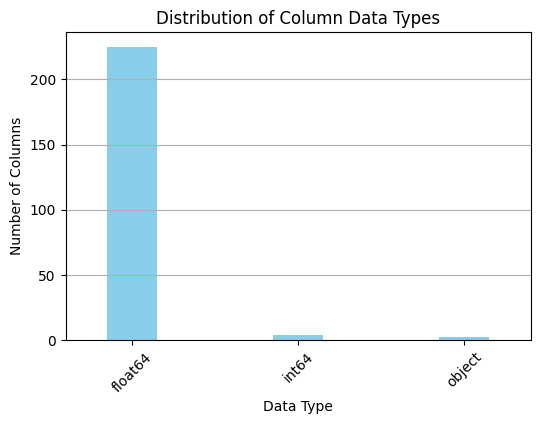

In [ ]:
# most columns are float64, four are int64, and two are object/string type

import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
dtype_counts.plot(kind='bar', color='skyblue',width = 0.3)
plt.title('Distribution of Column Data Types')
plt.ylabel('Number of Columns')
plt.xlabel('Data Type')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

###Summary staistics

In [ ]:
# get summary statistics like mean, median, mode
data.describe()


PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65       GENDER  DISEASE GROUPING 1  DISEASE GROUPING 2  DISEASE GROUPING 3  DISEASE GROUPING 4  DISEASE GROUPING 5  DISEASE GROUPING 6          HTN  IMMUNOCOMPROMISED        OTHER  ALBUMIN_MEDIAN  ALBUMIN_MEAN  ALBUMIN_MIN  ALBUMIN_MAX  ALBUMIN_DIFF  BE_ARTERIAL_MEDIAN  BE_ARTERIAL_MEAN  BE_ARTERIAL_MIN  BE_ARTERIAL_MAX  BE_ARTERIAL_DIFF  BE_VENOUS_MEDIAN  BE_VENOUS_MEAN  BE_VENOUS_MIN  BE_VENOUS_MAX  BE_VENOUS_DIFF  BIC_ARTERIAL_MEDIAN  BIC_ARTERIAL_MEAN  BIC_ARTERIAL_MIN  BIC_ARTERIAL_MAX  BIC_ARTERIAL_DIFF  BIC_VENOUS_MEDIAN  BIC_VENOUS_MEAN  BIC_VENOUS_MIN  BIC_VENOUS_MAX  BIC_VENOUS_DIFF  BILLIRUBIN_MEDIAN  BILLIRUBIN_MEAN  BILLIRUBIN_MIN  BILLIRUBIN_MAX  BILLIRUBIN_DIFF  BLAST_MEDIAN  BLAST_MEAN   BLAST_MIN   BLAST_MAX  BLAST_DIFF  CALCIUM_MEDIAN  CALCIUM_MEAN  CALCIUM_MIN  CALCIUM_MAX  CALCIUM_DIFF  CREATININ_MEDIAN  CREATININ_MEAN  CREATININ_MIN  CREATININ_MAX  CREATININ_DIFF  FFA_MEDIAN    FFA_MEAN     FFA_MIN     FFA_MAX  FFA_DIFF  GGT_MEDIAN    GGT_MEAN     GGT_MIN     GGT_MAX  GGT_DIFF  GLUCOSE_MEDIAN  GLUCOSE_MEAN  GLUCOSE_MIN  GLUCOSE_MAX  GLUCOSE_DIFF  HEMATOCRITE_MEDIAN  HEMATOCRITE_MEAN  HEMATOCRITE_MIN  HEMATOCRITE_MAX  HEMATOCRITE_DIFF  HEMOGLOBIN_MEDIAN  HEMOGLOBIN_MEAN  HEMOGLOBIN_MIN  HEMOGLOBIN_MAX  HEMOGLOBIN_DIFF  INR_MEDIAN    INR_MEAN     INR_MIN     INR_MAX  INR_DIFF  LACTATE_MEDIAN  LACTATE_MEAN  LACTATE_MIN  LACTATE_MAX  LACTATE_DIFF  LEUKOCYTES_MEDIAN  LEUKOCYTES_MEAN  LEUKOCYTES_MIN  LEUKOCYTES_MAX  LEUKOCYTES_DIFF  LINFOCITOS_MEDIAN  LINFOCITOS_MEAN  LINFOCITOS_MIN  LINFOCITOS_MAX  LINFOCITOS_DIFF  NEUTROPHILES_MEDIAN  NEUTROPHILES_MEAN  NEUTROPHILES_MIN  NEUTROPHILES_MAX  NEUTROPHILES_DIFF  P02_ARTERIAL_MEDIAN  P02_ARTERIAL_MEAN  P02_ARTERIAL_MIN  P02_ARTERIAL_MAX  P02_ARTERIAL_DIFF  P02_VENOUS_MEDIAN  P02_VENOUS_MEAN  P02_VENOUS_MIN  P02_VENOUS_MAX  P02_VENOUS_DIFF  PC02_ARTERIAL_MEDIAN  PC02_ARTERIAL_MEAN  PC02_ARTERIAL_MIN  PC02_ARTERIAL_MAX  PC02_ARTERIAL_DIFF  PC02_VENOUS_MEDIAN  PC02_VENOUS_MEAN  PC02_VENOUS_MIN  PC02_VENOUS_MAX  PC02_VENOUS_DIFF  PCR_MEDIAN    PCR_MEAN     PCR_MIN     PCR_MAX  PCR_DIFF  PH_ARTERIAL_MEDIAN  PH_ARTERIAL_MEAN  PH_ARTERIAL_MIN  PH_ARTERIAL_MAX  PH_ARTERIAL_DIFF  PH_VENOUS_MEDIAN  PH_VENOUS_MEAN  PH_VENOUS_MIN  PH_VENOUS_MAX  PH_VENOUS_DIFF  PLATELETS_MEDIAN  PLATELETS_MEAN  PLATELETS_MIN  PLATELETS_MAX  PLATELETS_DIFF  POTASSIUM_MEDIAN  POTASSIUM_MEAN  POTASSIUM_MIN  POTASSIUM_MAX  POTASSIUM_DIFF  SAT02_ARTERIAL_MEDIAN  SAT02_ARTERIAL_MEAN  SAT02_ARTERIAL_MIN  SAT02_ARTERIAL_MAX  SAT02_ARTERIAL_DIFF  SAT02_VENOUS_MEDIAN  SAT02_VENOUS_MEAN  SAT02_VENOUS_MIN  SAT02_VENOUS_MAX  SAT02_VENOUS_DIFF  SODIUM_MEDIAN  SODIUM_MEAN  SODIUM_MIN  SODIUM_MAX  SODIUM_DIFF  TGO_MEDIAN    TGO_MEAN     TGO_MIN     TGO_MAX  TGO_DIFF  TGP_MEDIAN    TGP_MEAN     TGP_MIN     TGP_MAX  TGP_DIFF  TTPA_MEDIAN   TTPA_MEAN    TTPA_MIN    TTPA_MAX  TTPA_DIFF  UREA_MEDIAN   UREA_MEAN    UREA_MIN    UREA_MAX  UREA_DIFF  DIMER_MEDIAN  DIMER_MEAN   DIMER_MIN   DIMER_MAX  DIMER_DIFF  BLOODPRESSURE_DIASTOLIC_MEAN  BLOODPRESSURE_SISTOLIC_MEAN  HEART_RATE_MEAN  RESPIRATORY_RATE_MEAN  TEMPERATURE_MEAN  OXYGEN_SATURATION_MEAN  BLOODPRESSURE_DIASTOLIC_MEDIAN  BLOODPRESSURE_SISTOLIC_MEDIAN  HEART_RATE_MEDIAN  RESPIRATORY_RATE_MEDIAN  TEMPERATURE_MEDIAN  OXYGEN_SATURATION_MEDIAN  BLOODPRESSURE_DIASTOLIC_MIN  BLOODPRESSURE_SISTOLIC_MIN  HEART_RATE_MIN  RESPIRATORY_RATE_MIN  TEMPERATURE_MIN  OXYGEN_SATURATION_MIN  BLOODPRESSURE_DIASTOLIC_MAX  BLOODPRESSURE_SISTOLIC_MAX  HEART_RATE_MAX  RESPIRATORY_RATE_MAX  TEMPERATURE_MAX  OXYGEN_SATURATION_MAX  BLOODPRESSURE_DIASTOLIC_DIFF  BLOODPRESSURE_SISTOLIC_DIFF  HEART_RATE_DIFF  RESPIRATORY_RATE_DIFF  TEMPERATURE_DIFF  OXYGEN_SATURATION_DIFF  BLOODPRESSURE_DIASTOLIC_DIFF_REL  BLOODPRESSURE_SISTOLIC_DIFF_REL  HEART_RATE_DIFF_REL  RESPIRATORY_RATE_DIFF_REL  TEMPERATURE_DIFF_REL  OXYGEN_SATURATION_DIFF_REL          ICU
count               1925.000000  1925.000000  1925.000000         1920.000000         1920.000000         192

###Analysis
- Any record where the window is greater than 12 cannot be used for modeling.
- If the patient is already in the ICU, their data cannot be used for modeling
- Each patient was assigned a unique identifier 0-384. Each patient was evaluated for health signs five times. That is why each patient has five records (1925/385 = 5). Each record will have a different window value.
- 46.8% of patients are above 65 years old
- Disease Grouping 1 - 6 are actually binary values. Should probably be converted to binary, instead of float/int.
- A lot of counts are lower than 1925, indicating missing values.



##Data Quality Assessment
Goals:
1.	Identify and document missing values and potential reasons.
2.	Spot and document outliers and anomalies.


###Identify and analyze missing values

<Axes: >

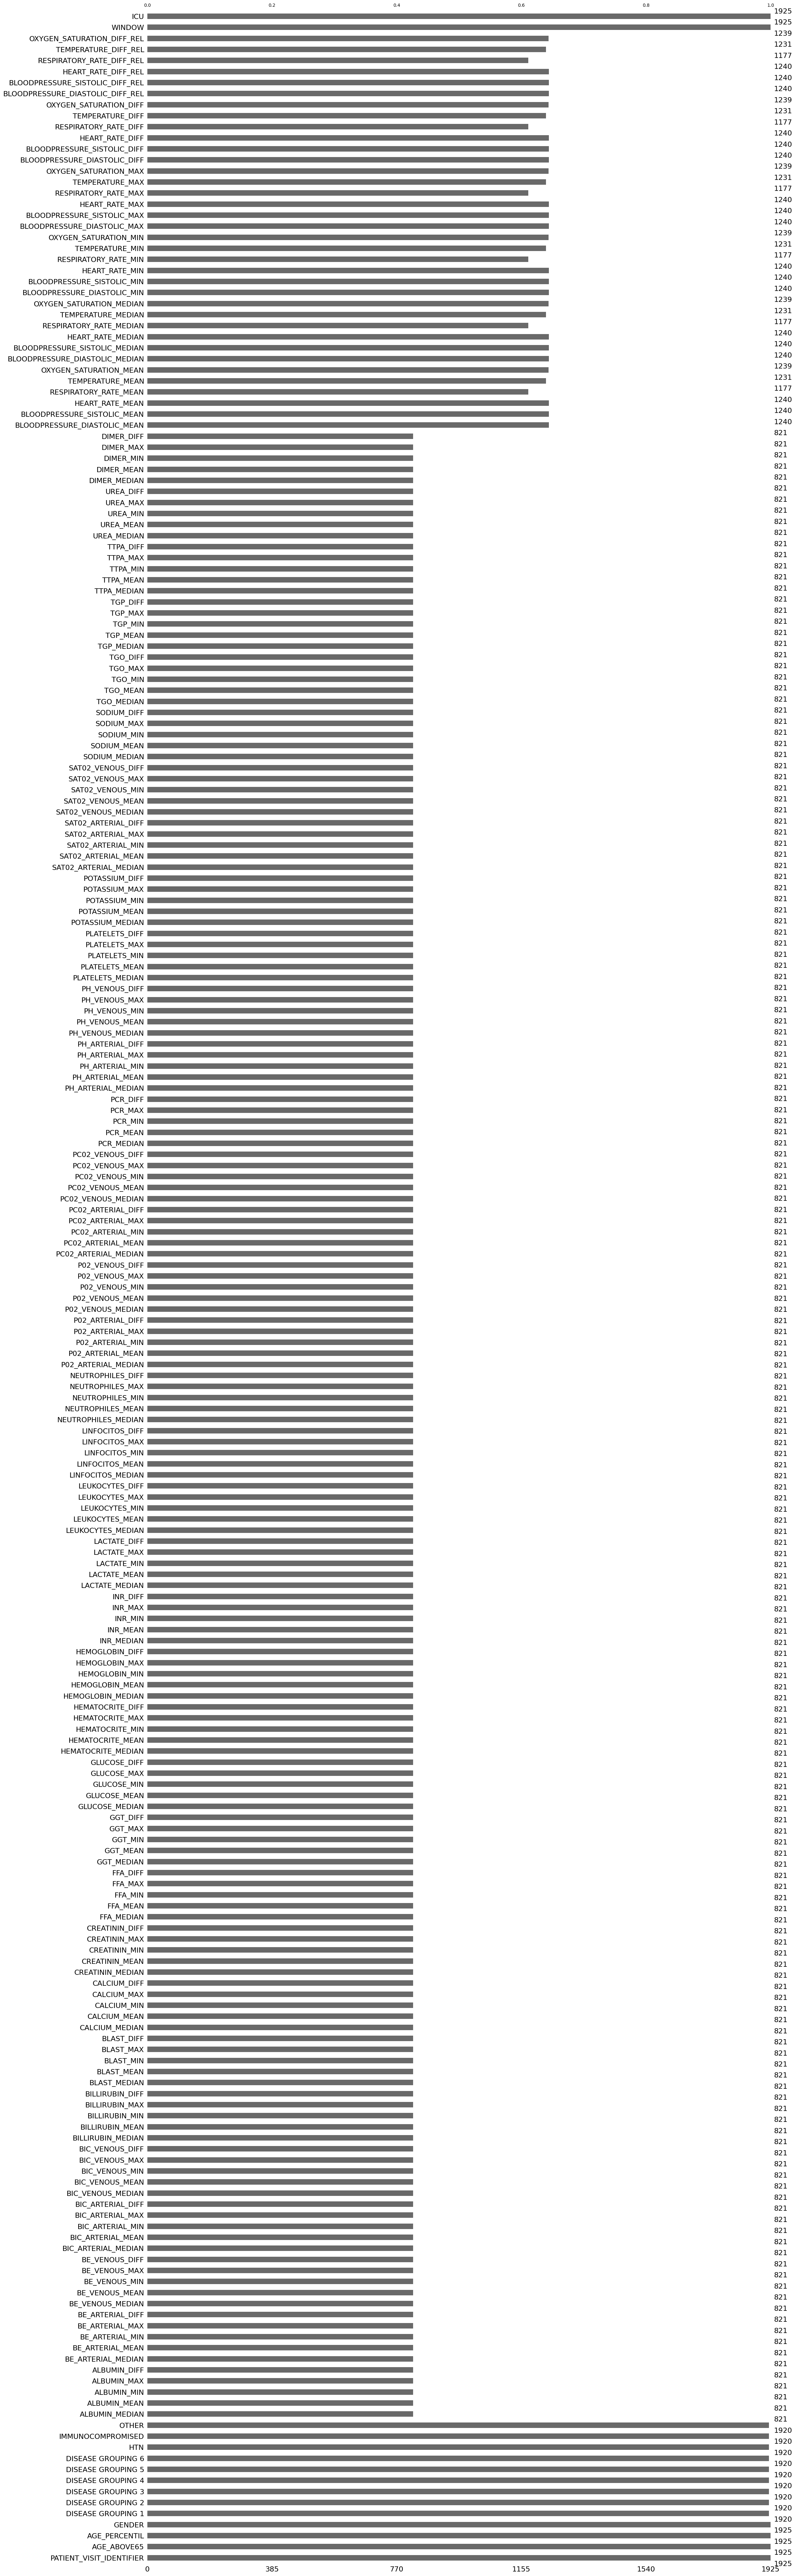

In [ ]:
# Shows existing values in straightforward bar graph with counts
import missingno as msno
%matplotlib inline
msno.bar(data)

In [ ]:
# Purpose of this code is to identify columns to consider dropping

# Calculate percentage of missing data for each feature
percent_of_missing_data_in_each_feature = data.isnull().mean() * 100
num_columns_to_drop = 0

# Display columns that are missing more than 50% of their data
print(" - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - ")
for index, (feature, percent) in enumerate (percent_of_missing_data_in_each_feature.items()):
  if percent > 50:
    num_columns_to_drop += 1
    print(f"{index}. {feature} is missing {percent:.2f}% of its values")

print(f"\n Total number of columns to drop: {num_columns_to_drop}")


 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
13. ALBUMIN_MEDIAN is missing 57.35% of its values
14. ALBUMIN_MEAN is missing 57.35% of its values
15. ALBUMIN_MIN is missing 57.35% of its values
16. ALBUMIN_MAX is missing 57.35% of its values
17. ALBUMIN_DIFF is missing 57.35% of its values
18. BE_ARTERIAL_MEDIAN is missing 57.35% of its values
19. BE_ARTERIAL_MEAN is missing 57.35% of its values
20. BE_ARTERIAL_MIN is missing 57.35% of its values
21. BE_ARTERIAL_MAX is missing 57.35% of its values
22. BE_ARTERIAL_DIFF is missing 57.35% of its values
23. BE_VENOUS_MEDIAN is missing 57.35% of its values
24. BE_VENOUS_MEAN is missing 57.35% of its values
25. BE_VENOUS_MIN is missing 57.35% of its values
26. BE_VENOUS_MAX is missing 57.35% of its values
27. BE_VENOUS_DIFF is missing 57.35% of its values
28. BIC_ARTERIAL_MEDIAN is missing 57.35% of its values
29. BIC_ARTERIAL_MEAN is missing 57.35% of its values
30. BIC_ARTERIAL_MIN is missing 57.35% of its values


Simple conclusion: drop columns 13 - 192

###Analysis
- 180 features are missing greater than 50% of their values. Inputation might not be a sensible option. Consider dropping these columns?
- The data set is missing a significant amount of data. We only have approximately 49.6% of all possible data. Only six columns of the 231 columns are not missing values. Unsure of the reason for now.

##Visualizations
Goals:
1.	Histograms, scatter plots, and box plots to reveal distributions and relationships.
2.	Heatmaps and other visualizations for correlation analysis among different variables.
3. Time-series analysis if the data has a temporal component (e.g., trends over the pandemic period).

###Gender

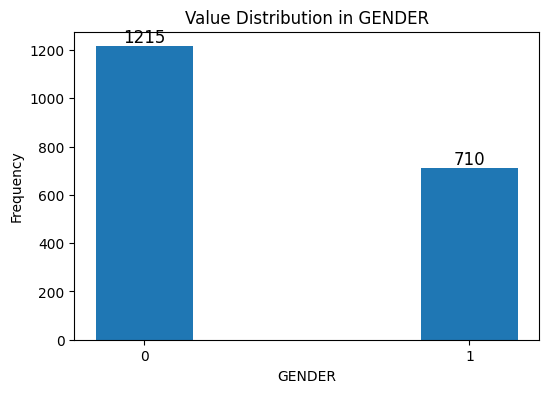

In [ ]:


def extract_age_from_string(age_string):
    # Function to extract the numeric part of the age string
    age = int(''.join(filter(str.isdigit, age_string)))
    return age

def univariate_exploration(data, column_name):
    if column_name == 'GENDER':
        if data[column_name].dtype == 'int64' or data[column_name].dtype == 'float64':
            # If the column contains numerical data, create a histogram
            counts = data[column_name].value_counts()
            plt.figure(figsize=(6, 4))
            plt.bar(counts.index, counts.values, width=0.3)
            plt.xticks([0, 1], ['0', '1'])
            plt.xlabel(column_name)
            plt.ylabel('Frequency')
            plt.title(f'Value Distribution in {column_name}')

            # Add data counts as annotations on top of the bars
            for x, y in zip(counts.index, counts.values):
                plt.text(x, y, f'{y}', ha='center', va='bottom', fontsize=12)

            plt.show()
    if column_name == 'AGE_PERCENTIL':
        if data[column_name].dtype == 'object':
            # If the column contains strings, extract and convert to numeric values
            data[column_name] = data[column_name].apply(extract_age_from_string)

        if data[column_name].dtype == 'int64' or data[column_name].dtype == 'float64':
            # Create a histogram for the numeric age data
            plt.hist(data[column_name], bins=10)  # Adjust the number of bins as needed
            plt.xlabel('Age')
            plt.ylabel('Frequency')
            plt.title(f'Age Distribution in {column_name}')
            plt.show()

# Example usage
univariate_exploration(data, 'GENDER')




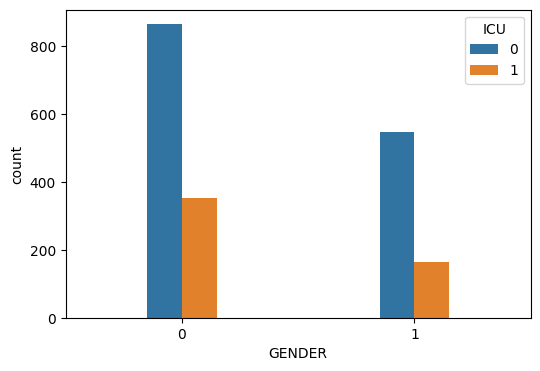

In [ ]:
# GENDER
plt.figure(figsize=(6, 4))
ax = sns.countplot(x="GENDER", hue="ICU", data=data, width= 0.3)
## Gender 0 is at a slightly higher risk if considered standalone
## Although there may be other factors influencing the high icu count for it

###Age Above 65

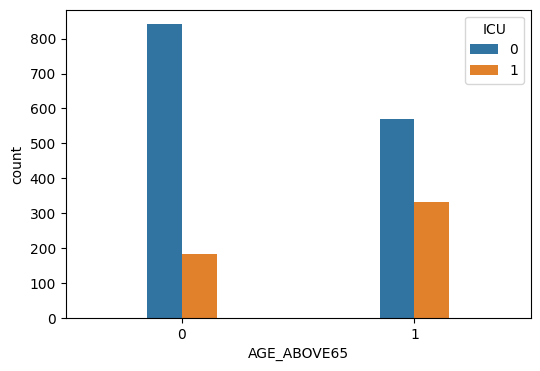

In [ ]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x="AGE_ABOVE65", hue="ICU", data=data,width=0.3)
## People with age above 65 have a higher chance of needing an ICU

###Age Percentile

<Axes: >

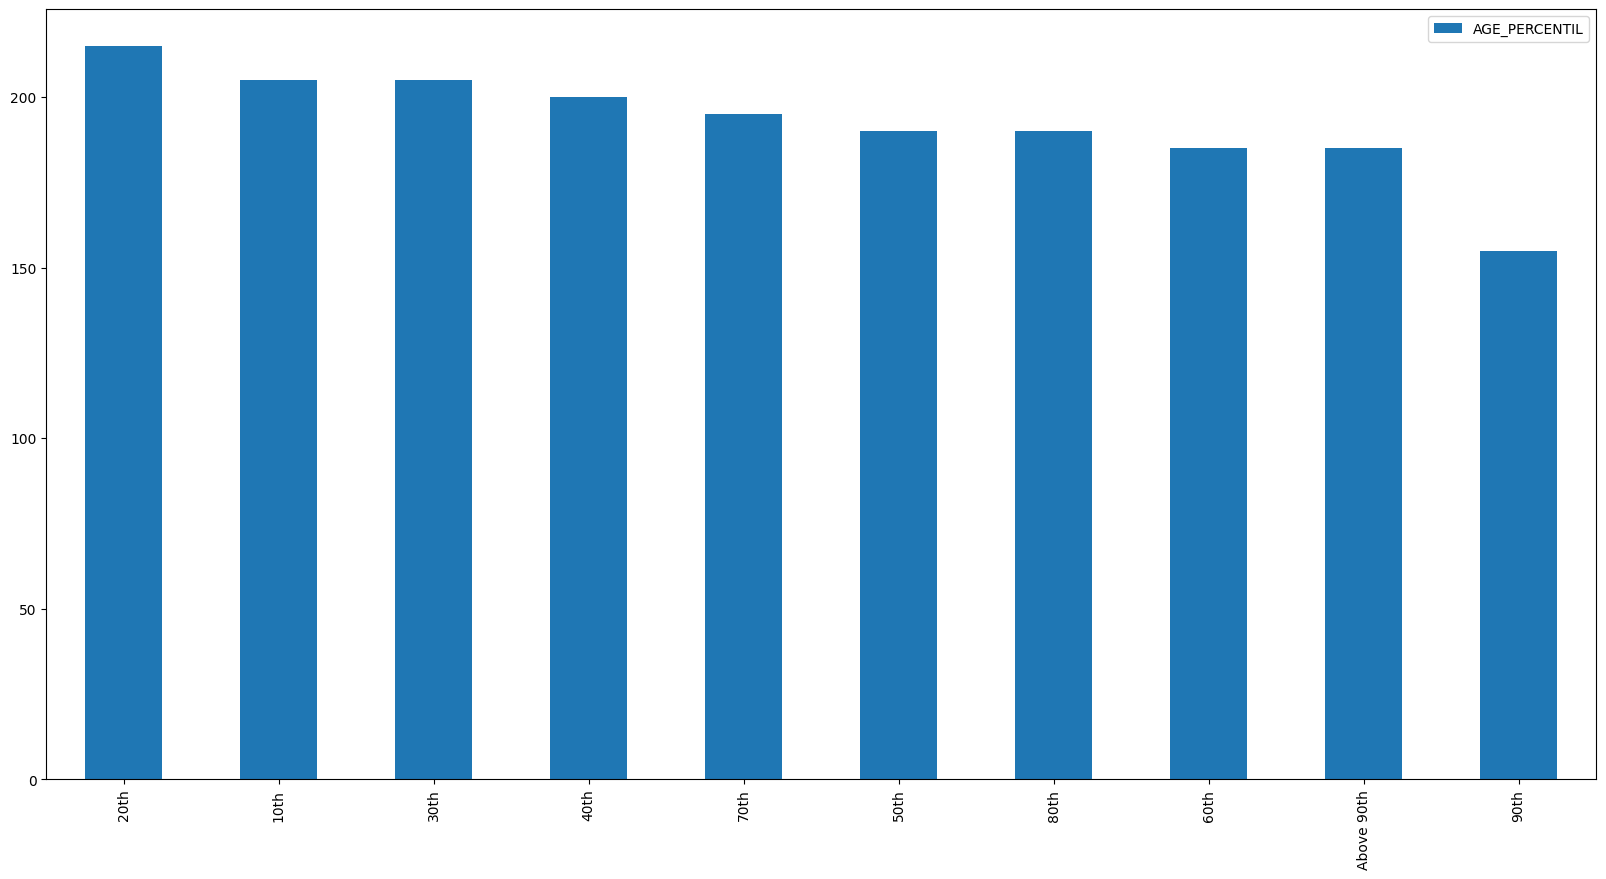

In [ ]:
pd.DataFrame(data['AGE_PERCENTIL'].value_counts()).plot(kind='bar', figsize=(20,10))

###Gender Split

In [ ]:
# create a temporary dataframe
icu_count = [data[data['ICU']==0 ].shape[0],  data[ data['ICU']==1 ].shape[0] ]

gender_count = [data[ (data['ICU']==0) & (data['GENDER']==0)].shape[0],
                data[ (data['ICU']==1) & (data['GENDER']==0)].shape[0] ]

above65_count = [data[ (data['ICU']==0) & (data['AGE_ABOVE65']==1) ].shape[0],
                 data[ (data['ICU']==1) & (data['AGE_ABOVE65']==1) ].shape[0] ]

plot_df = pd.DataFrame(list(zip(icu_count, gender_count, above65_count)), columns =['icu_count', 'gender_count','above65_count'])

plot_df

icu_count  gender_count  above65_count
0       1410           863            569
1        515           352            331

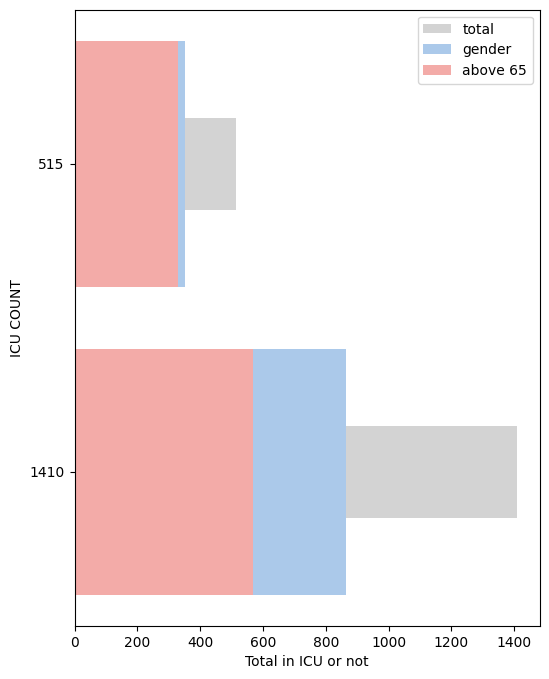

In [ ]:
sns.set_color_codes("pastel")
fig = plt.subplots(figsize=(6,8))

ax = sns.barplot(x="icu_count", y="icu_count", data=plot_df, label="total", orient='h', color="lightgray", width = 0.3)

sns.barplot(x="gender_count", y="icu_count", data=plot_df, label="gender", orient='h', color="b")

sns.barplot(x="above65_count", y="icu_count", data=plot_df, label="above 65" , orient='h', color="r")

ax.set(ylabel="ICU COUNT",xlabel="Total in ICU or not")
plt.legend()

###Disease Groupings

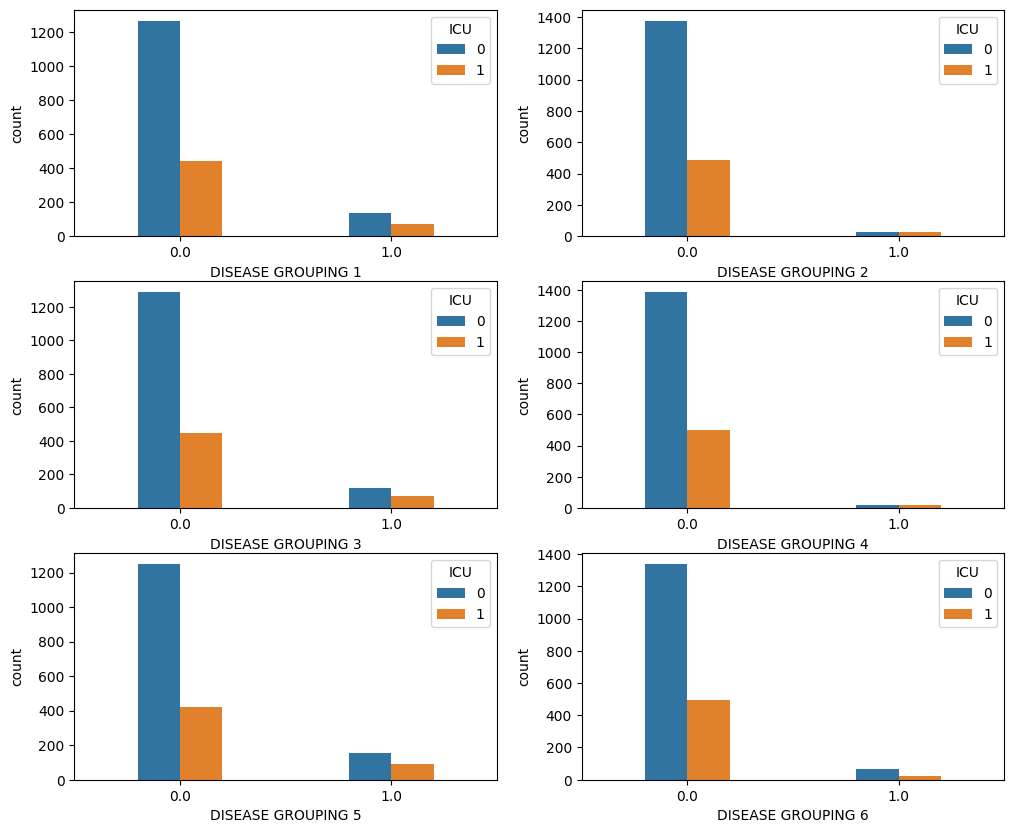

<Figure size 200x400 with 0 Axes>

<Figure size 200x400 with 0 Axes>

<Figure size 200x400 with 0 Axes>

<Figure size 200x400 with 0 Axes>

<Figure size 200x400 with 0 Axes>

<Figure size 200x400 with 0 Axes>

In [ ]:
disease_grp = ['DISEASE GROUPING 1','DISEASE GROUPING 2','DISEASE GROUPING 3',
               'DISEASE GROUPING 4', 'DISEASE GROUPING 5', 'DISEASE GROUPING 6']

fig, axes = plt.subplots(ncols=2,nrows=3,figsize=(12,10))
col = 0

for i in range(len(disease_grp)):
  plt.figure(figsize=(2, 4))
  sns.countplot(x=disease_grp[i], hue="ICU", data=data, ax = axes[int((i)/2)][col], width = 0.4)
  col = (col+1) % 2

###HTN

<Axes: xlabel='HTN', ylabel='count'>

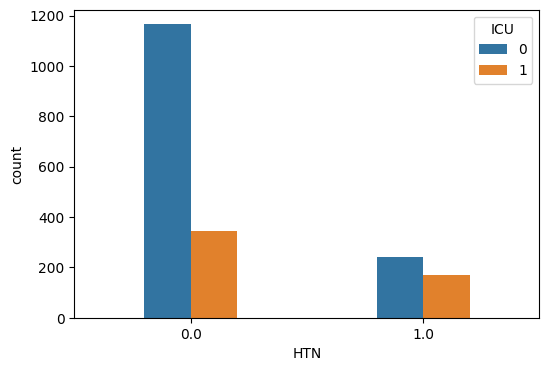

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x="HTN", hue="ICU", data=data, width=0.4)

## For hypertension - people with hypertension have a slightly higher chance of needing the ICU
## However, it cannot be claimed with certainity as there is high imbalance

###Immunocompromised

<Axes: xlabel='IMMUNOCOMPROMISED', ylabel='count'>

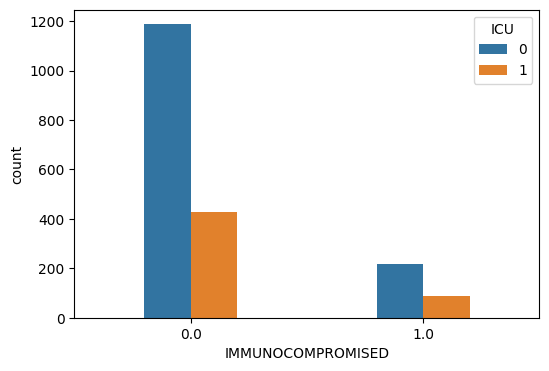

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x="IMMUNOCOMPROMISED", hue="ICU", data=data,width=0.4)

## Immunocompromised or non-immunocompromised does not make a significant difference, the distribution
## looks similar for both, we cannot make any claims as the people with some immunocompromised conditions
## are fewer than ones with such condition.

###Other

<Axes: xlabel='OTHER', ylabel='count'>

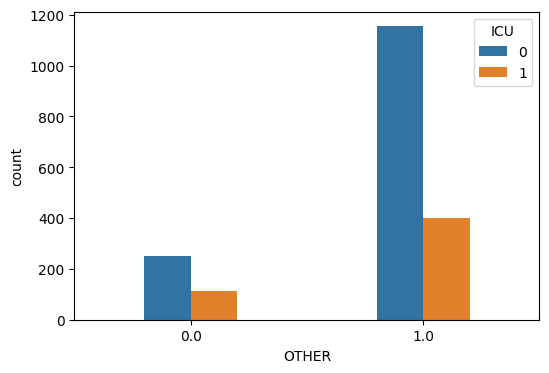

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x="OTHER", hue="ICU", data=data, width = 0.4)

###ICU admissions proportion according to age percentile

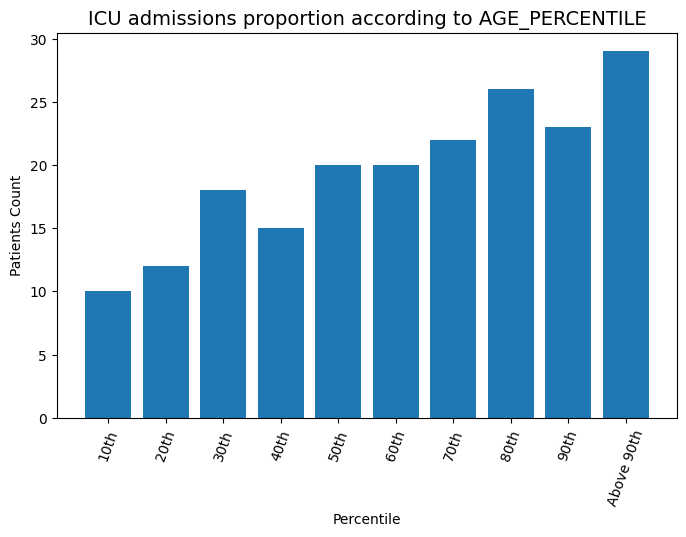

In [ ]:
# proportion of patients admitted/ not admitted to ICU
ICU_prop = data[data['WINDOW'] == 'ABOVE_12']
#group by ICU admission
ICU_prop_main = ICU_prop.groupby('ICU')['PATIENT_VISIT_IDENTIFIER'].count().reset_index()

#Age distribution of patients(percentiles) according to ICU admissions
AGE_prop_percentil = ICU_prop[ICU_prop['ICU'] == 1]
AGE_prop_percentil = AGE_prop_percentil.groupby('AGE_PERCENTIL')['PATIENT_VISIT_IDENTIFIER'].count().reset_index()
AGE_prop_percentil.head()
plt.figure(figsize=(8,5))
plt.bar(AGE_prop_percentil["AGE_PERCENTIL"],AGE_prop_percentil["PATIENT_VISIT_IDENTIFIER"])
plt.xticks(rotation = 70)
plt.ylabel("Patients Count")
plt.xlabel("Percentile")
plt.title('ICU admissions proportion according to AGE_PERCENTILE', fontdict= {'fontsize' : 14})
plt.show()


###Density Plots

<Figure size 640x480 with 0 Axes>

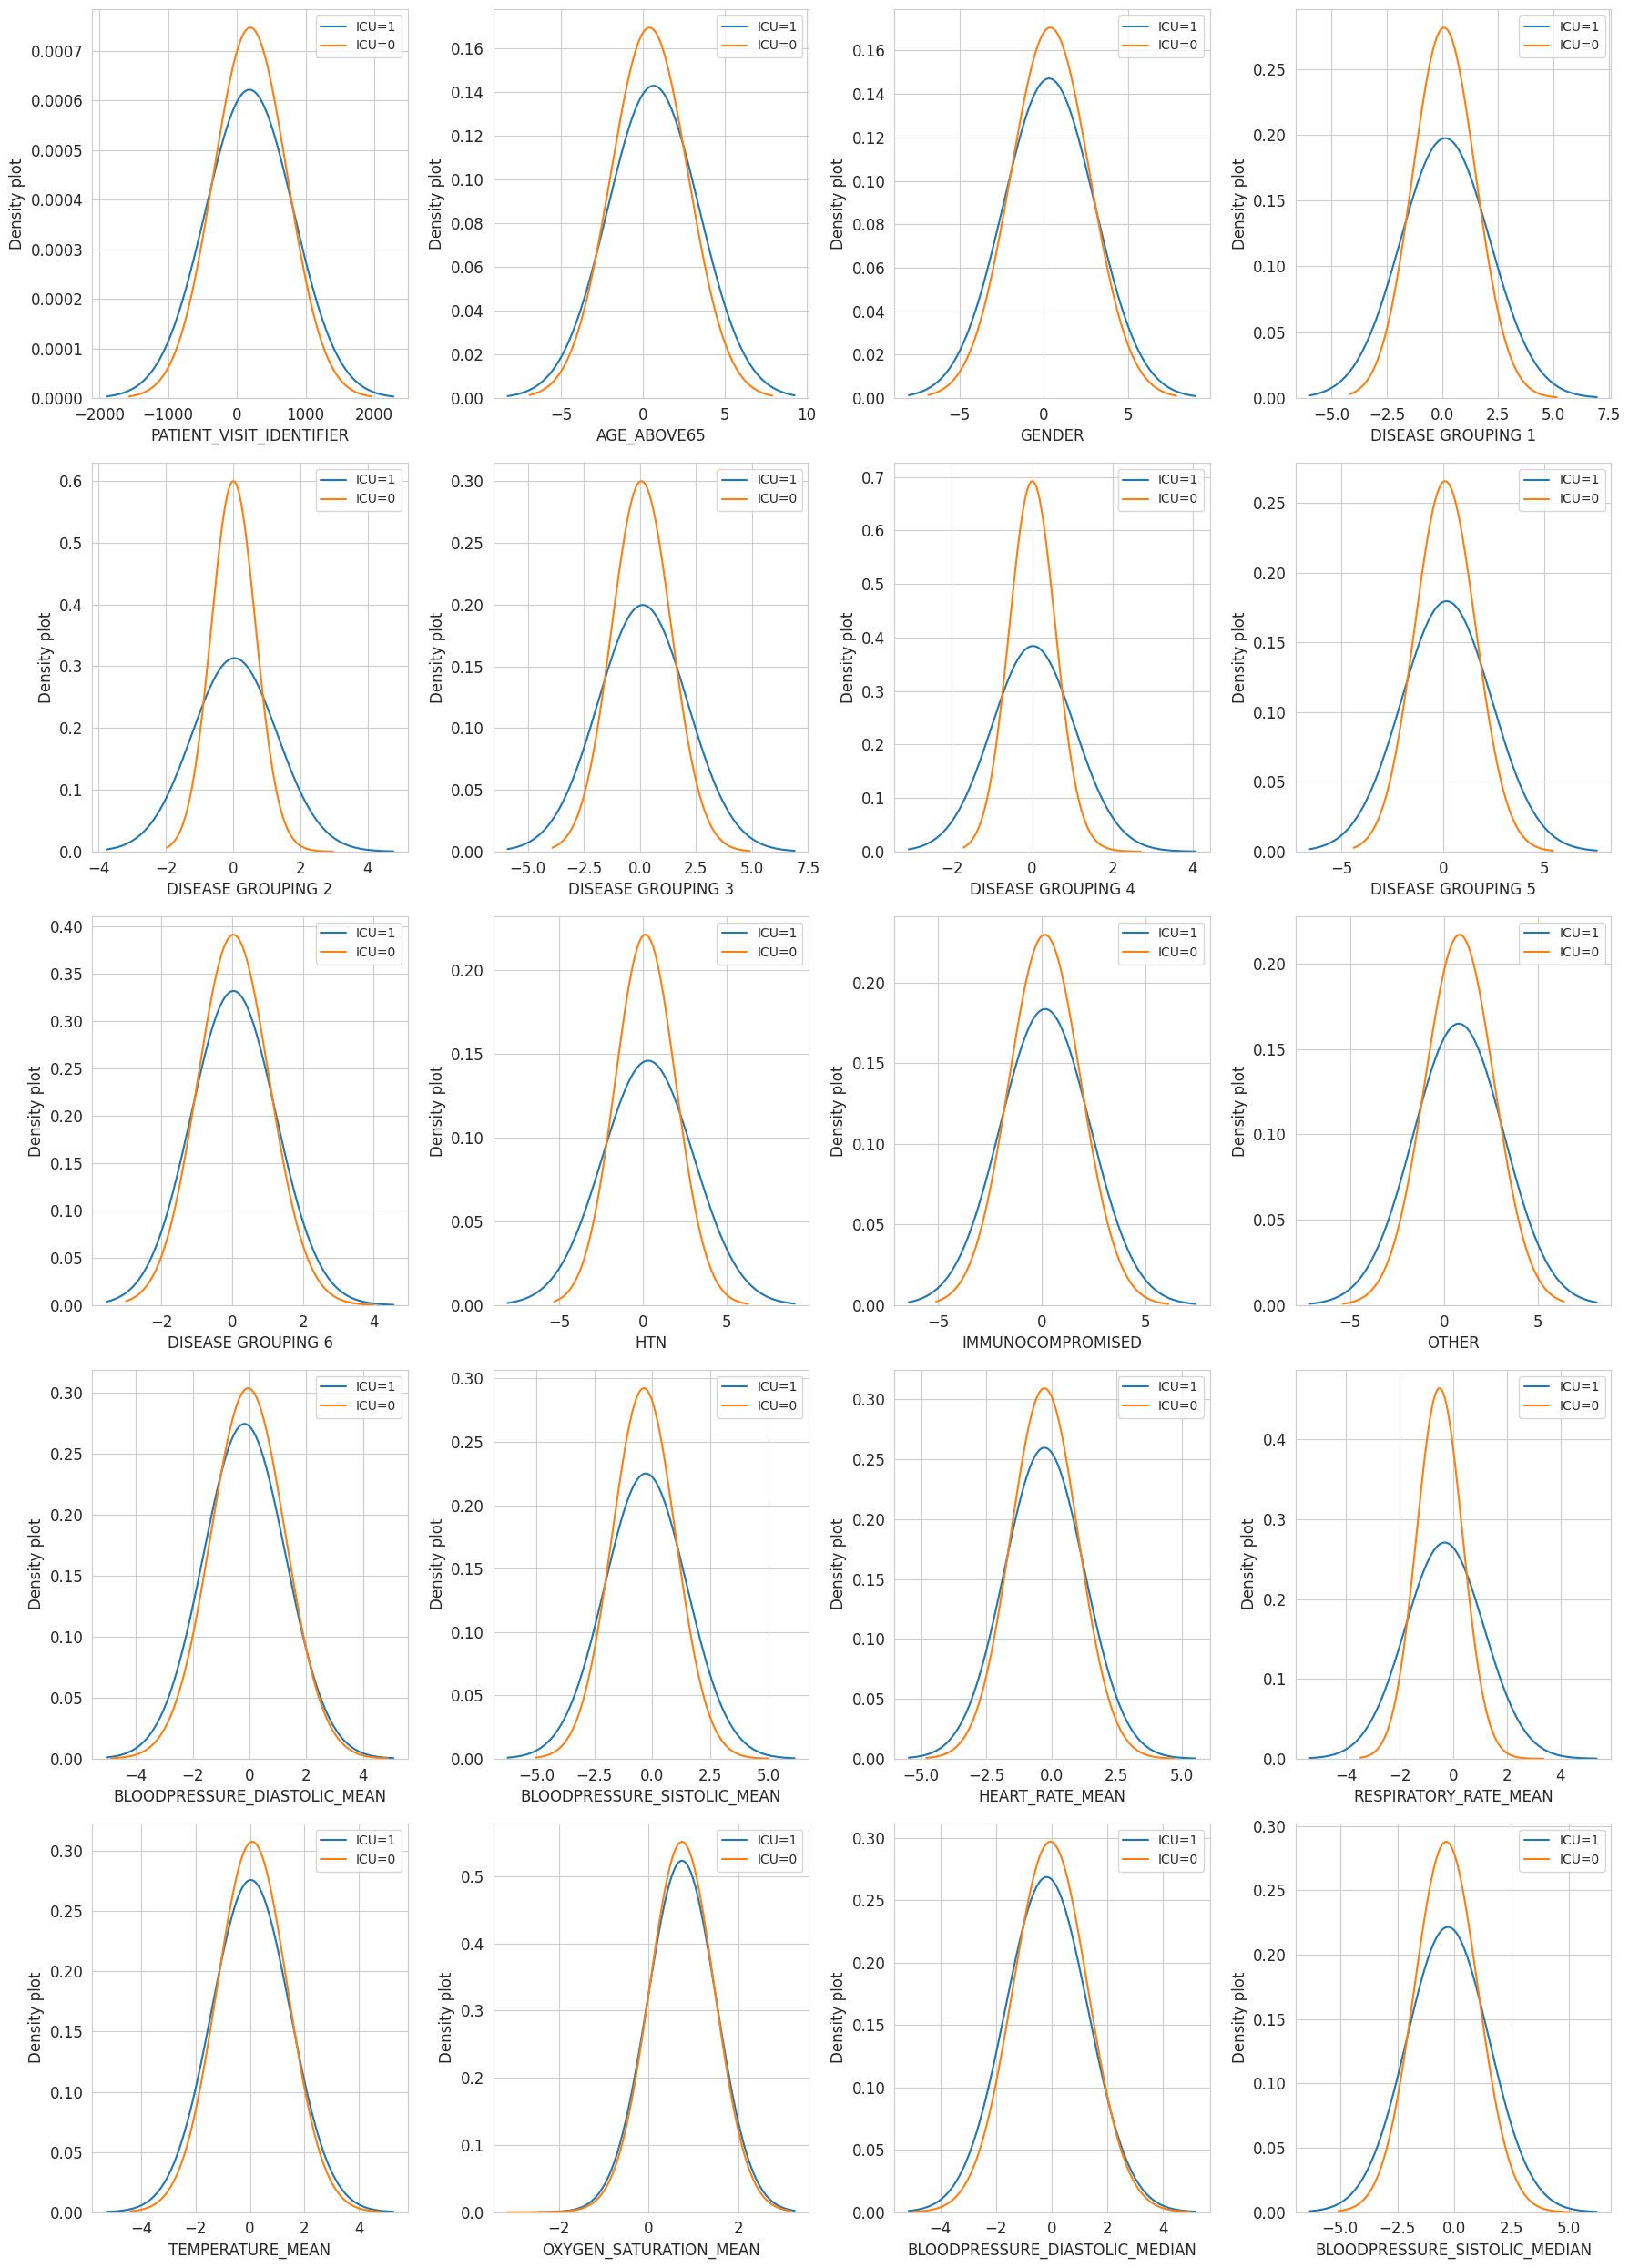

<Figure size 640x480 with 0 Axes>

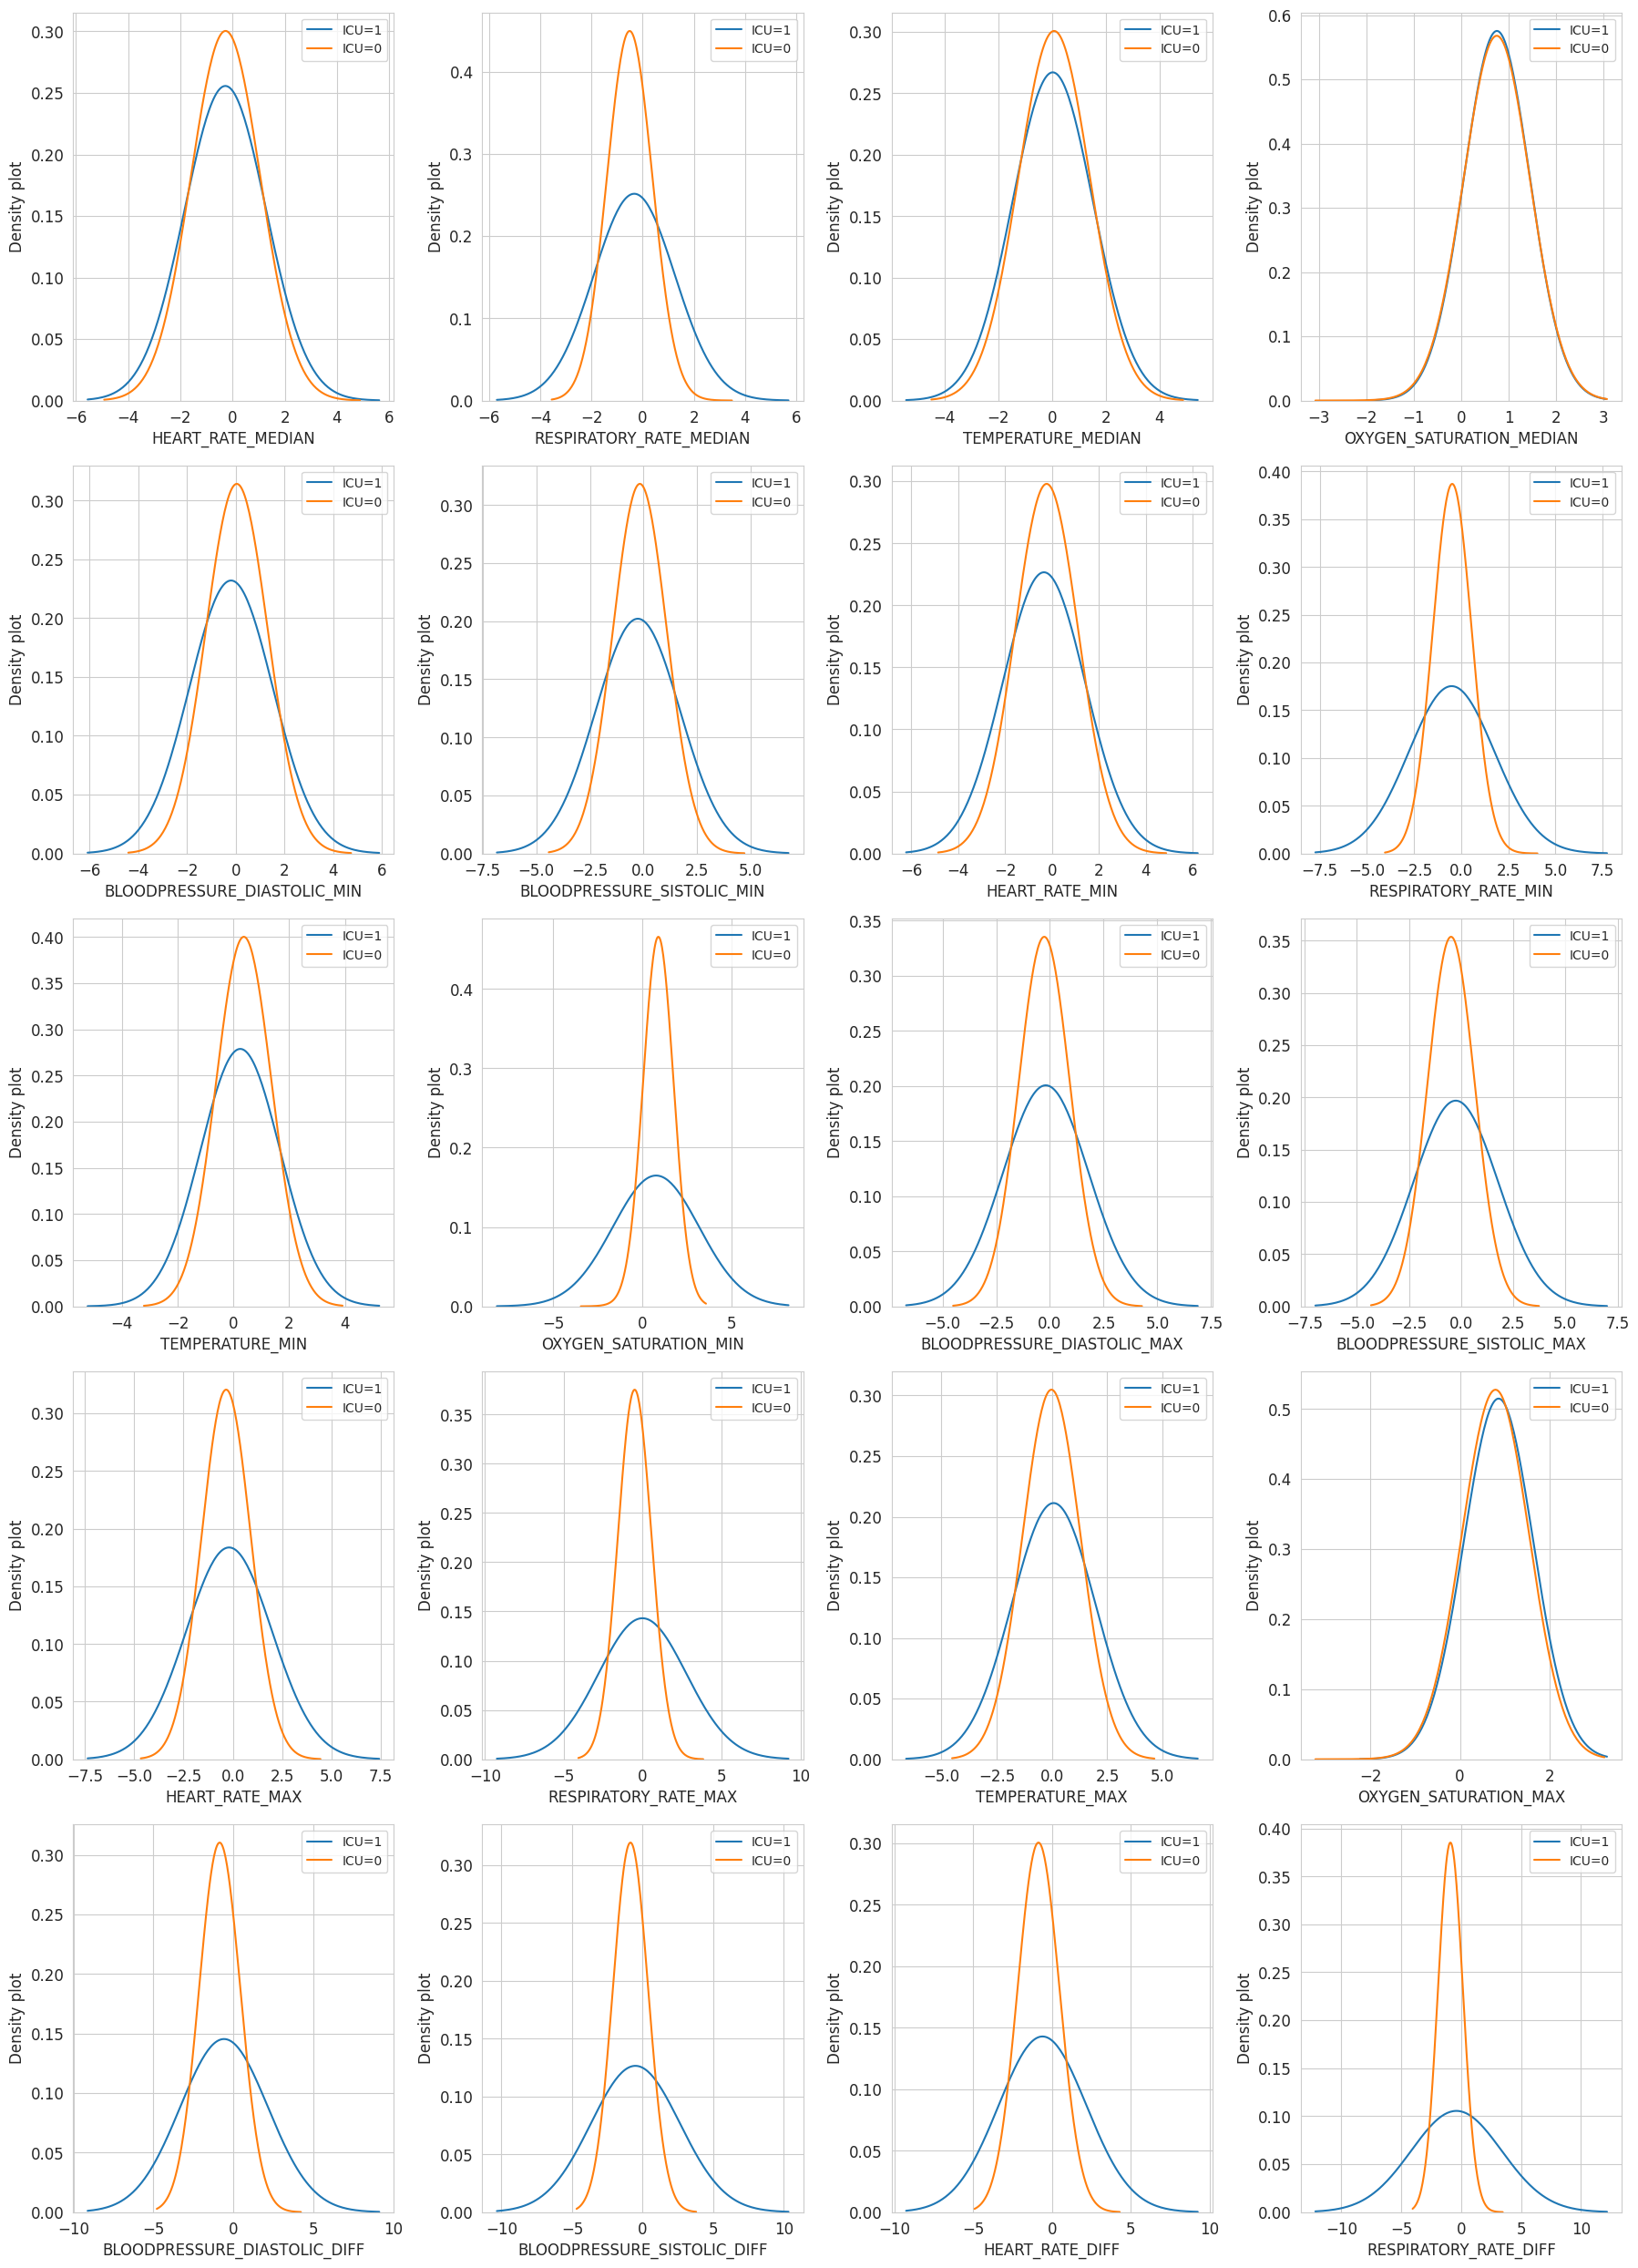

<Figure size 640x480 with 0 Axes>

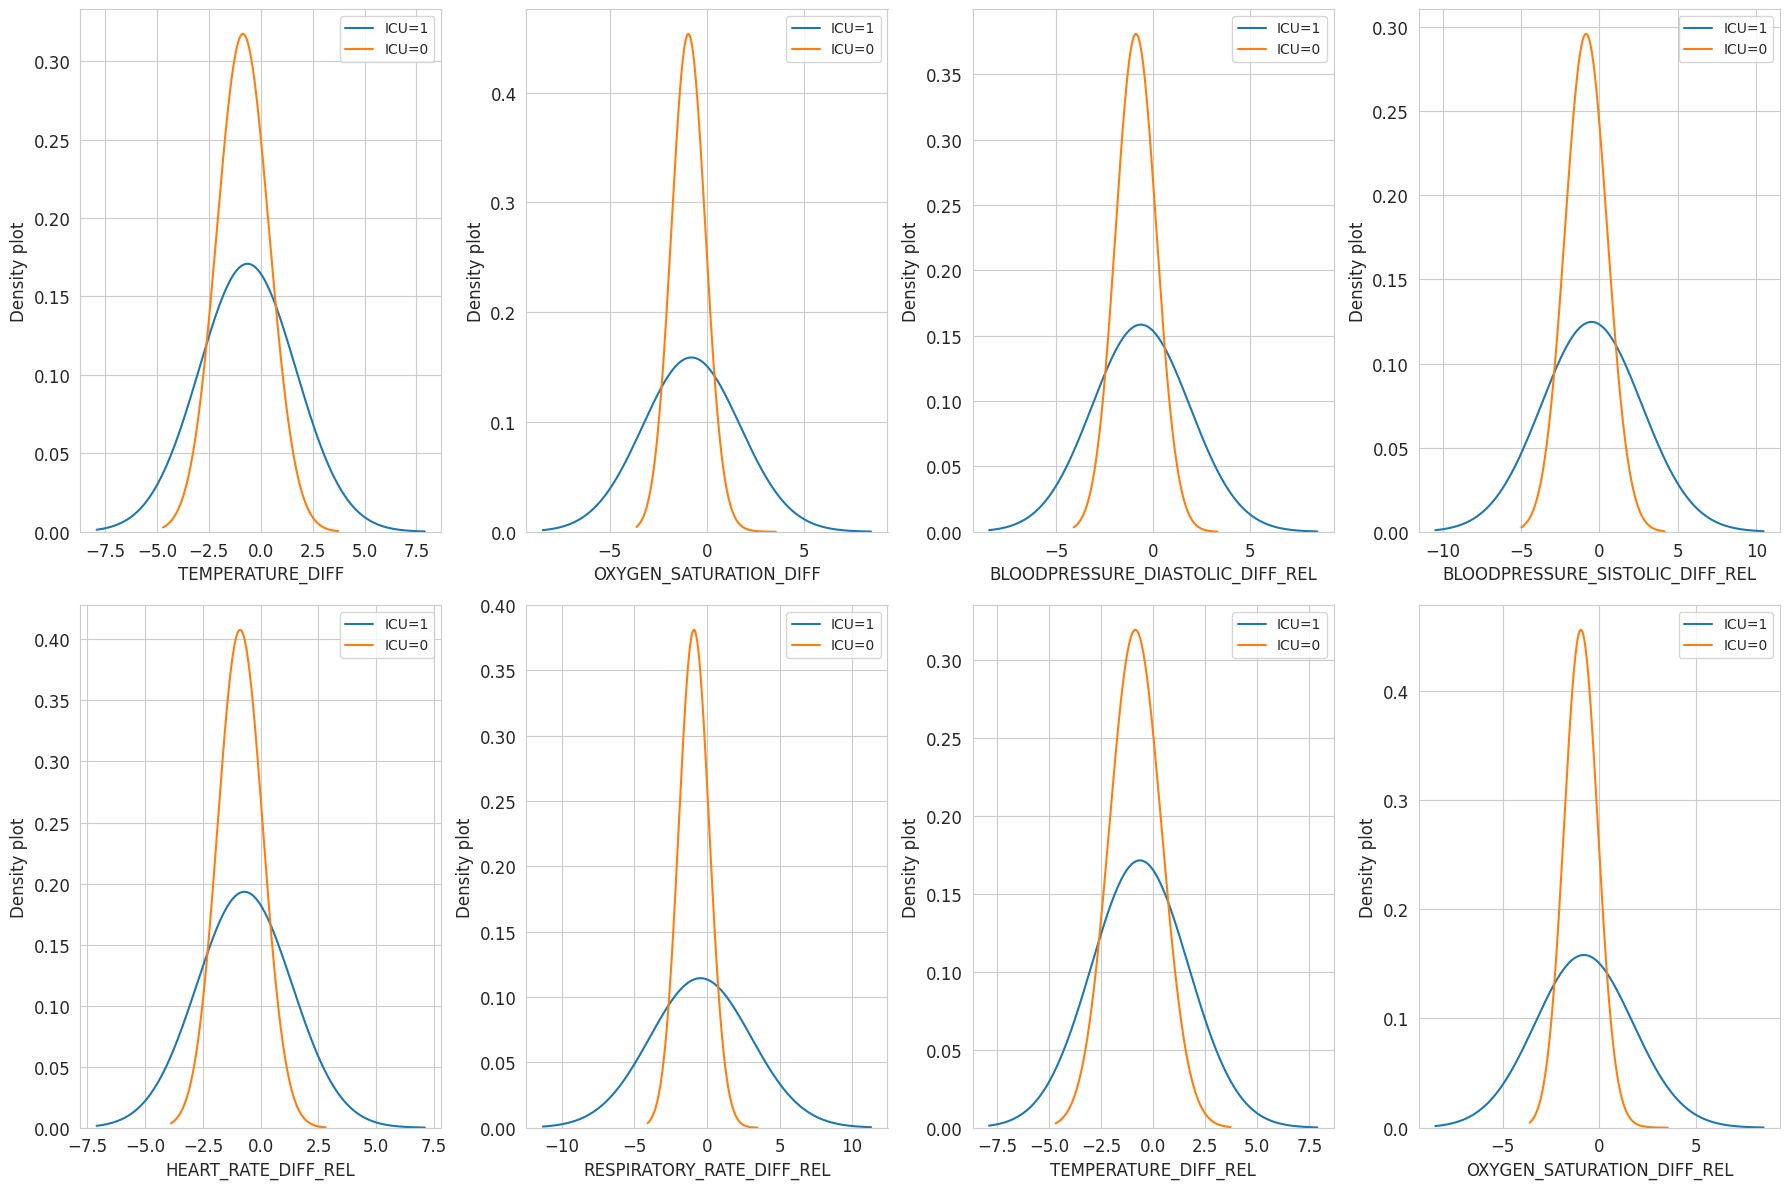

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the columns of interest
columns_of_interest_2 = ['HEART_RATE_MEDIAN', 'RESPIRATORY_RATE_MEDIAN', 'TEMPERATURE_MEDIAN', 'OXYGEN_SATURATION_MEDIAN', 'BLOODPRESSURE_DIASTOLIC_MIN', 'BLOODPRESSURE_SISTOLIC_MIN', 'HEART_RATE_MIN', 'RESPIRATORY_RATE_MIN', 'TEMPERATURE_MIN', 'OXYGEN_SATURATION_MIN', 'BLOODPRESSURE_DIASTOLIC_MAX', 'BLOODPRESSURE_SISTOLIC_MAX', 'HEART_RATE_MAX', 'RESPIRATORY_RATE_MAX', 'TEMPERATURE_MAX', 'OXYGEN_SATURATION_MAX', 'BLOODPRESSURE_DIASTOLIC_DIFF', 'BLOODPRESSURE_SISTOLIC_DIFF', 'HEART_RATE_DIFF', 'RESPIRATORY_RATE_DIFF', ]

columns_of_interest_1 =  ['PATIENT_VISIT_IDENTIFIER', 'AGE_ABOVE65', 'GENDER', 'DISEASE GROUPING 1', 'DISEASE GROUPING 2', 'DISEASE GROUPING 3', 'DISEASE GROUPING 4', 'DISEASE GROUPING 5', 'DISEASE GROUPING 6', 'HTN', 'IMMUNOCOMPROMISED', 'OTHER', 'BLOODPRESSURE_DIASTOLIC_MEAN', 'BLOODPRESSURE_SISTOLIC_MEAN', 'HEART_RATE_MEAN', 'RESPIRATORY_RATE_MEAN', 'TEMPERATURE_MEAN', 'OXYGEN_SATURATION_MEAN', 'BLOODPRESSURE_DIASTOLIC_MEDIAN', 'BLOODPRESSURE_SISTOLIC_MEDIAN']

columns_of_interest_3 = ['TEMPERATURE_DIFF', 'OXYGEN_SATURATION_DIFF', 'BLOODPRESSURE_DIASTOLIC_DIFF_REL', 'BLOODPRESSURE_SISTOLIC_DIFF_REL', 'HEART_RATE_DIFF_REL', 'RESPIRATORY_RATE_DIFF_REL', 'TEMPERATURE_DIFF_REL', 'OXYGEN_SATURATION_DIFF_REL',]

def density_plot(columns_of_interest, num, num_2):
  sns.set_style('whitegrid')
  plt.figure()
  fig, ax = plt.subplots(num, 4, figsize=(18, num_2))

  for i, feature in enumerate(columns_of_interest):
      row, col = divmod(i, 4)
      sns.kdeplot(data[data['ICU'] == 1][feature], bw_adjust=20, ax=ax[row, col])
      sns.kdeplot(data[data['ICU'] == 0][feature], bw_adjust=20, ax=ax[row, col])
      ax[row, col].set_ylabel('Density plot', fontsize=12)
      ax[row, col].set_xlabel(feature, fontsize=12)
      ax[row, col].tick_params(axis='both', which='major', labelsize=12)
      ax[row, col].legend(['ICU=1', 'ICU=0'], loc='best')

  plt.tight_layout()
  plt.show()
density_plot(columns_of_interest_1, 5, 25)
density_plot(columns_of_interest_2, 5, 25)
density_plot(columns_of_interest_3, 2, 12)


From here observation let us know about the realtion of that category whether this should be used in the making decision or not, conluding we will drop to columns
- OXYGEN_SATURATION_MEDIAN
- OXYGEN_SATURATION_MAX

Analysis of charts. The following features have a high degree of overlap with ICU admission and are therefore likely not very predictive:

1. GENDER
2. DISEASE GROUPING 6
3. IMMUNOCOMPROMISED
4. OTHER

The other features do not overlap as much with ICU admission and therefore appear to be more predictive.

###Window

In [ ]:
pd.crosstab(data.WINDOW, data.ICU)

ICU         0    1
WINDOW            
0-2       353   32
2-4       326   59
4-6       286   99
6-12      255  130
ABOVE_12  190  195

In [ ]:
icu_personal = data.groupby("PATIENT_VISIT_IDENTIFIER", as_index=False).agg({"ICU":list, "WINDOW":list})
icu_personal.head(15)

PATIENT_VISIT_IDENTIFIER              ICU                           WINDOW
0                          0  [0, 0, 0, 0, 1]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
1                          1  [1, 1, 1, 1, 1]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
2                          2  [0, 0, 0, 0, 1]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
3                          3  [0, 0, 0, 0, 0]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
4                          4  [0, 0, 0, 0, 0]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
5                          5  [0, 0, 0, 0, 0]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
6                          6  [0, 0, 0, 0, 0]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
7                          7  [0, 0, 0, 0, 0]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
8                          8  [0, 0, 0, 0, 0]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
9                          9  [0, 0, 0, 0, 0]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
10                        10  [0, 0, 0, 0, 0]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
11                        11  [0, 0, 0, 1, 1]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
12                        12  [0, 0, 0, 0, 0]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
13                        13  [0, 0, 0, 0, 1]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
14                        14  [0, 0, 1, 1, 1]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]

###Pearson correlation

In [ ]:
df_corr= data.corr()
#msno.heatmap(df_corr)

<ipython-input-28-6d10457fe32d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr= data.corr()


In [ ]:
# Show correlation values in stacked format
def rank_correlation_score (data):

    # Stacked correlation map into 3-columns format
    stacked_corr = data.corr().stack().reset_index().rename(
        columns = {"level_0":"Feature_1",
                   "level_1":"Feature_2",
                   0: "Pearson_Correlation"})

    # Remove redudant relationships
    stacked_corr = stacked_corr.query('Feature_1 != Feature_2')
    chained_feature_names = ['-'.join(np.sort(x)) for x in stacked_corr[['Feature_1', 'Feature_2']].values]
    stacked_corr.loc[:,'Duplicate_Key'] = chained_feature_names
    stacked_corr = stacked_corr.drop_duplicates(subset = 'Duplicate_Key').drop(columns = 'Duplicate_Key')

    #Remove correlations to the target
    stacked_corr = stacked_corr[stacked_corr['Feature_1'] != 'ICU']
    stacked_corr = stacked_corr[stacked_corr['Feature_2'] != 'ICU']

    # Order absolute correlation strenght
    stacked_corr['Pearson_Correlation'] = abs(stacked_corr['Pearson_Correlation'])
    return stacked_corr.sort_values(by='Pearson_Correlation', ascending=False)


stacked_df_corr = rank_correlation_score(data)
stacked_df_corr

<ipython-input-29-f7580c0d87c8>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  stacked_corr = data.corr().stack().reset_index().rename(
<ipython-input-29-f7580c0d87c8>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stacked_corr.loc[:,'Duplicate_Key'] = chained_feature_names


Feature_1               Feature_2  Pearson_Correlation
27161          TGP_MEDIAN                TGP_MEAN             1.000000
23282    POTASSIUM_MEDIAN           POTASSIUM_MIN             1.000000
7955         CALCIUM_MEAN             CALCIUM_MIN             1.000000
7956         CALCIUM_MEAN             CALCIUM_MAX             1.000000
13195          INR_MEDIAN                 INR_MAX             1.000000
...                   ...                     ...                  ...
400                GENDER             ALBUMIN_MIN             0.000063
399                GENDER            ALBUMIN_MEAN             0.000063
398                GENDER          ALBUMIN_MEDIAN             0.000063
401                GENDER             ALBUMIN_MAX             0.000063
764    DISEASE GROUPING 1  OXYGEN_SATURATION_DIFF             0.000040

[18336 rows x 3 columns]

In [ ]:
#Filter very strong correlations
stacked_df_corr[stacked_df_corr['Pearson_Correlation'] > 0.99]

Feature_1                        Feature_2  Pearson_Correlation
27161                   TGP_MEDIAN                         TGP_MEAN             1.000000
23282             POTASSIUM_MEDIAN                    POTASSIUM_MIN             1.000000
7955                  CALCIUM_MEAN                      CALCIUM_MIN             1.000000
7956                  CALCIUM_MEAN                      CALCIUM_MAX             1.000000
13195                   INR_MEDIAN                          INR_MAX             1.000000
13194                   INR_MEDIAN                          INR_MIN             1.000000
13193                   INR_MEDIAN                         INR_MEAN             1.000000
8149                   CALCIUM_MIN                      CALCIUM_MAX             1.000000
23283             POTASSIUM_MEDIAN                    POTASSIUM_MAX             1.000000
23281             POTASSIUM_MEDIAN                   POTASSIUM_MEAN             1.000000
4657           BIC_ARTERIAL_MEDIAN                BIC_ARTERIAL_MEAN             1.000000
8537              CREATININ_MEDIAN                   CREATININ_MEAN             1.000000
8538              CREATININ_MEDIAN                    CREATININ_MIN             1.000000
8539              CREATININ_MEDIAN                    CREATININ_MAX             1.000000
17267            P02_ARTERIAL_MEAN                 P02_ARTERIAL_MIN             1.000000
17268            P02_ARTERIAL_MEAN                 P02_ARTERIAL_MAX             1.000000
27938                  TTPA_MEDIAN                         TTPA_MIN             1.000000
27937                  TTPA_MEDIAN                        TTPA_MEAN             1.000000
25997                   SODIUM_MIN                       SODIUM_MAX             1.000000
4658           BIC_ARTERIAL_MEDIAN                 BIC_ARTERIAL_MIN             1.000000
13581                      INR_MIN                          INR_MAX             1.000000
7761                CALCIUM_MEDIAN                     CALCIUM_MEAN             1.000000
20177                   PCR_MEDIAN                         PCR_MEAN             1.000000
25803                  SODIUM_MEAN                       SODIUM_MIN             1.000000
25804                  SODIUM_MEAN                       SODIUM_MAX             1.000000
2331                ALBUMIN_MEDIAN                      ALBUMIN_MAX             1.000000
28132                    TTPA_MEAN                         TTPA_MAX             1.000000
23476               POTASSIUM_MEAN                    POTASSIUM_MAX             1.000000
23475               POTASSIUM_MEAN                    POTASSIUM_MIN             1.000000
7762                CALCIUM_MEDIAN                      CALCIUM_MIN             1.000000
4659           BIC_ARTERIAL_MEDIAN                 BIC_ARTERIAL_MAX             1.000000
7763                CALCIUM_MEDIAN                      CALCIUM_MAX             1.000000
13388                     INR_MEAN                          INR_MAX             1.000000
13387                     INR_MEAN                          INR_MIN             1.000000
28131                    TTPA_MEAN                         TTPA_MIN             1.000000
2523                  ALBUMIN_MEAN                      ALBUMIN_MIN             1.000000
2524                  ALBUMIN_MEAN                      ALBUMIN_MAX             1.000000
27939                  TTPA_MEDIAN                         TTPA_MAX             1.000000
4269                 BE_VENOUS_MIN                    BE_VENOUS_MAX             1.000000
26385                   TGO_MEDIAN                         TGO_MEAN             1.000000
26386                   TGO_MEDIAN                          TGO_MIN             1.000000
9508                      FFA_MEAN                          FFA_MAX             1.000000
3105            BE_ARTERIAL_MEDIAN                 BE_ARTERIAL_MEAN             1.000000
3106            BE_ARTERIAL_MEDIAN                  BE_ARTERIAL_MIN             1.000000
22700               

According to the Pearson correlation results, all columns above 0.99 indicate high similarity with each other. In this case, similar columns need to be extracted from regular columns

##Initial Hypotheses


Goals:
1. Formulate and document initial hypotheses based on observed data patterns.This might include, for instance, hypothesizing that certain pre-existing conditions or demographic factors are strongly predictive of ICU needs.

#### Initial Hypotheses


The features that appear to be most predictive of ICU admission are as follows:

1. DISEASE GROUPING 1 - 5
2. HTN
3. AGE_ABOVE65

Among these, DISEASE GROUPINGS 2, 4, as well as HTN appear to be quite predictive

##Ethical Considerations
Goals:
1. Document ethical aspects of the data, such as anonymization and potential biases. Discuss how they might impact the analysis and conclusions.

#### Anonymization

According to the author of the data on Kaggle, the date was "anonymized following the best international practices and recommendations." With respect to remaining data, it's possible that the PATIENT_VISIT_IDENTIFIER feature could be problematic, as it corresponds to specific patients and might not be informative for the ML model.

#### Biases

Several of the Boolean features, the disease groupings 1-6 in particular, appear to be severely imbalanced.

##Preliminary Data Cleaning Strategy


Goals:
1. Provide recommendations for addressing missing data and outliers.
2. Provide initial thoughts on data transformation needs (normalization, encoding categorical variables, etc.).


#### Missing Data Recommendations

- 180 features are missing greater than 50% of their values. Inputation might not be a sensible option. Consider dropping these columns.



#### Initial Thoughts for Data Transformation Needs

- Disease groupings 1-6 should be convereted to Boolean features, along with AGE_ABOVE65, GENDER, HTN, and OTHER. Double check for any other Boolean features. Boolean data type is likely most appropriate. INT could also work well. Float64 likely isn't the best fit.
- Convert the two 'object' features (they're really string data types) to some type of more appropriate encoding. Can likely employ label encoding, whereby  each unique string value is converted into a unique numerical value.



#Step 2 - Data Preparation

##Remove columns and rows that are missing too much data

In [ ]:
# Drop columns missing more than 50% of their data

# Calculate percentage of missing data for each feature
percent_of_missing_data_in_each_feature = data.isnull().mean() * 100

# Collect names of columns to be dropped
names_of_columns_to_drop = []
for index, (feature, percent) in enumerate (percent_of_missing_data_in_each_feature.items()):
  if percent > 50:
    names_of_columns_to_drop.append(feature)

# Create new "clean" data frame
data_clean = data.copy()

print(f"Number of columns in data frame that I will not modify: {len(data.columns)}")




# Drop each column in clean data frame that is missing more than 50% of data
for column in names_of_columns_to_drop:
  data_clean.drop([column], axis=1, inplace=True)


# verify 231 - 180 = 51
print(f"Number of columns in data set that I want to modify:  {len(data_clean.columns)}")

Number of columns in data frame that I will not modify: 231
Number of columns in data set that I want to modify:  51


In [ ]:
# Remove rows associated with patient 199 as no measurements were taken
data_clean = data_clean[data_clean['PATIENT_VISIT_IDENTIFIER'] != 199]

##Refactor columns that are innappropriate data types

In [ ]:
#Change the two object (string) columns into numerical data

definitions = []

for column in data_clean.columns:
    if data_clean[column].dtype == 'object':
      # Get codes and uniques from object column. Returns tuple of two items
      codesAndUniques = pd.factorize(data_clean[column])

      # Replace object column data with codes. First item of tuple.
      data_clean[column] = codesAndUniques[0]

      # Append codes and uniques to array
      definitions.append([np.unique( codesAndUniques[0]),  codesAndUniques[1]])

print(f"Here are the definitions for the object columns that were just encoded as integers: \n\n{definitions}\n")

print("To verify, here are the data types for each column:\n")
for index, column in enumerate(data_clean.columns):
  print(f"{index}. {column} is {data_clean[column].dtype}")

Here are the definitions for the object columns that were just encoded as integers: 

[[array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), Index(['60th', '90th', '10th', '40th', '70th', '20th', '50th', '80th', '30th', 'Above 90th'], dtype='object')], [array([0, 1, 2, 3, 4]), Index(['0-2', '2-4', '4-6', '6-12', 'ABOVE_12'], dtype='object')]]

To verify, here are the data types for each column:

0. PATIENT_VISIT_IDENTIFIER is int64
1. AGE_ABOVE65 is int64
2. AGE_PERCENTIL is int64
3. GENDER is int64
4. DISEASE GROUPING 1 is float64
5. DISEASE GROUPING 2 is float64
6. DISEASE GROUPING 3 is float64
7. DISEASE GROUPING 4 is float64
8. DISEASE GROUPING 5 is float64
9. DISEASE GROUPING 6 is float64
10. HTN is float64
11. IMMUNOCOMPROMISED is float64
12. OTHER is float64
13. BLOODPRESSURE_DIASTOLIC_MEAN is float64
14. BLOODPRESSURE_SISTOLIC_MEAN is float64
15. HEART_RATE_MEAN is float64
16. RESPIRATORY_RATE_MEAN is float64
17. TEMPERATURE_MEAN is float64
18. OXYGEN_SATURATION_MEAN is float64
19. BLOODPRES

<ipython-input-33-c80f35de20f4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[column] = codesAndUniques[0]
<ipython-input-33-c80f35de20f4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[column] = codesAndUniques[0]


<Axes: >

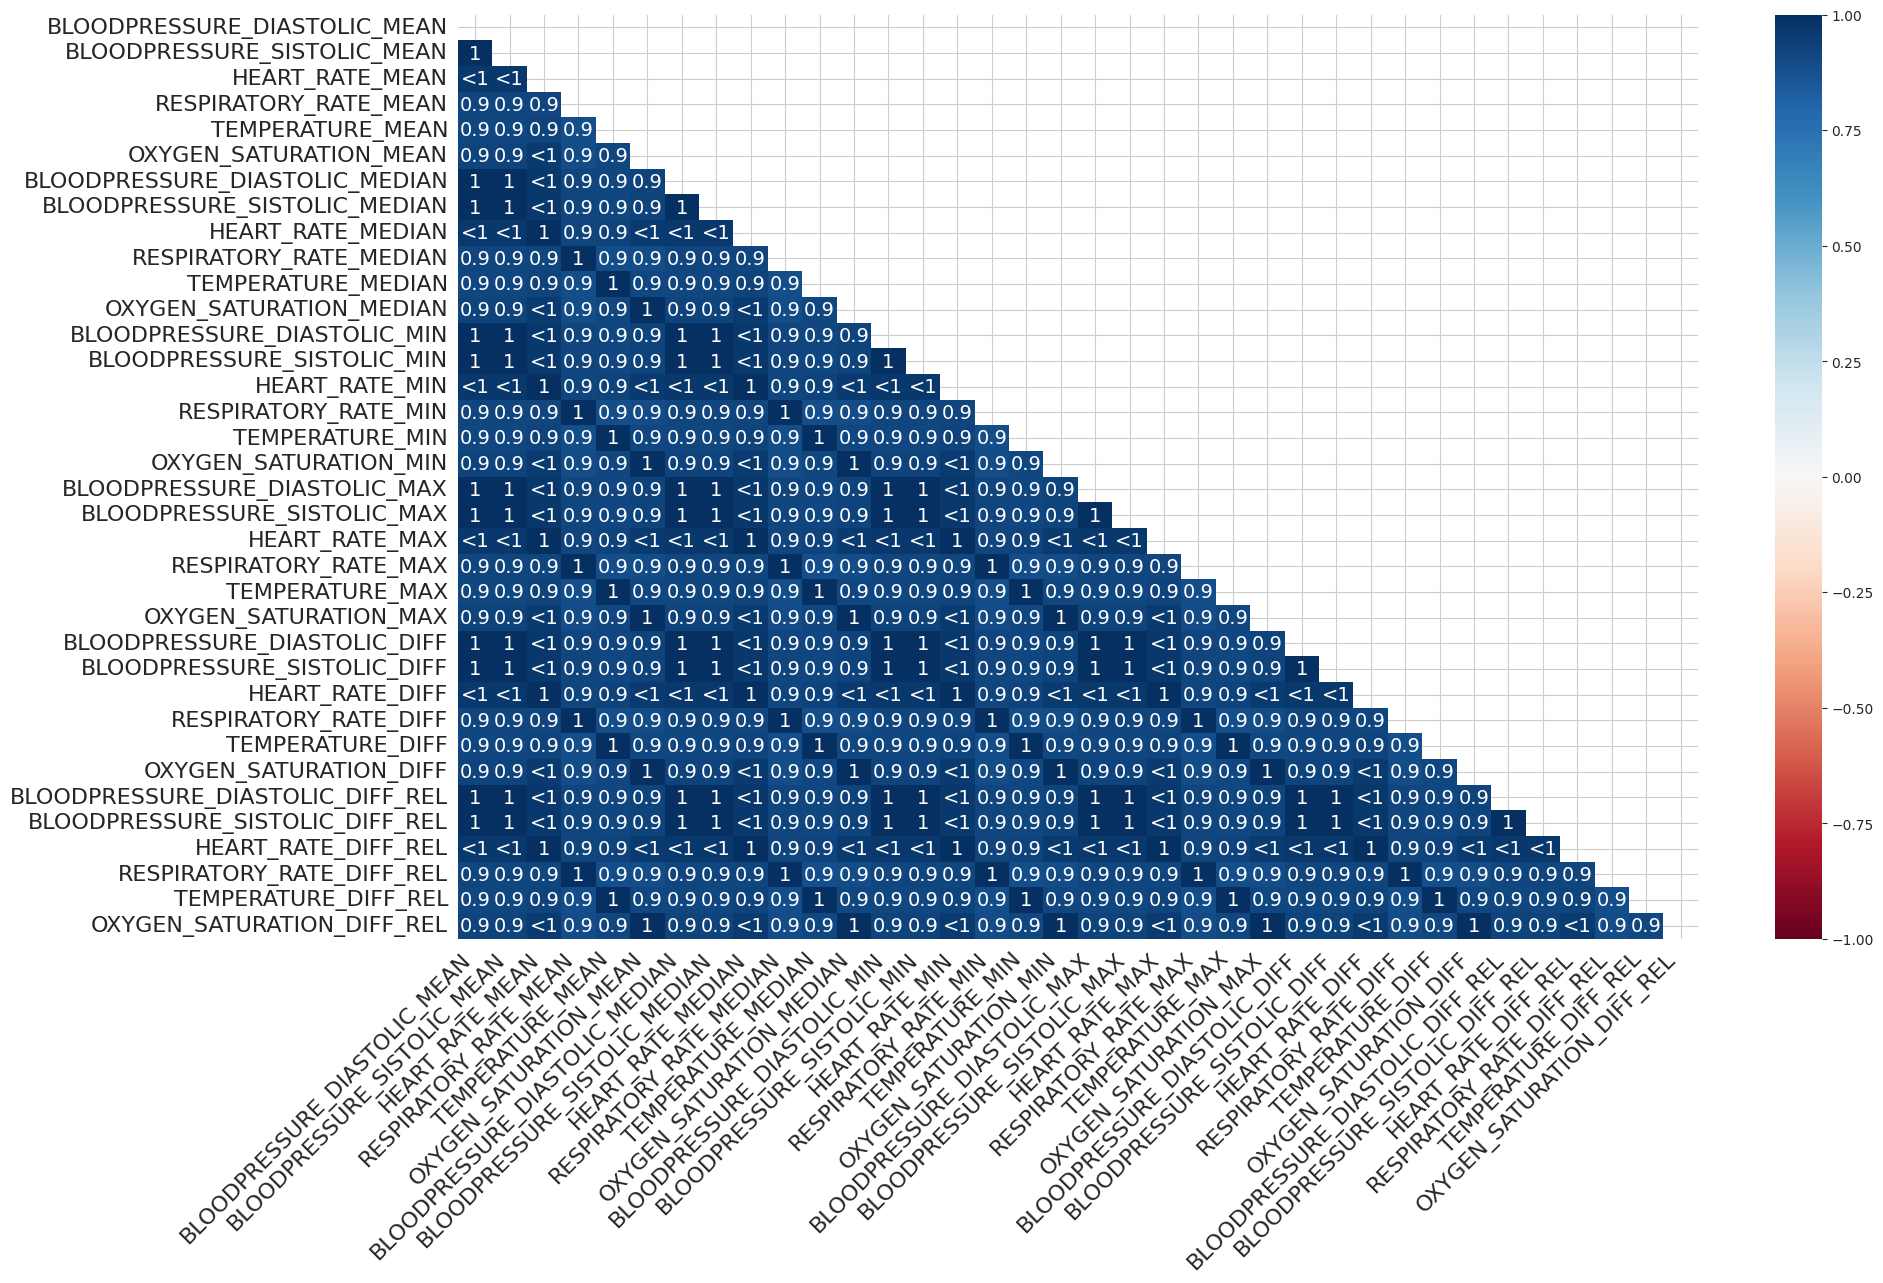

In [ ]:
msno.heatmap(data_clean)

Displaying Data before imputing

<Axes: >

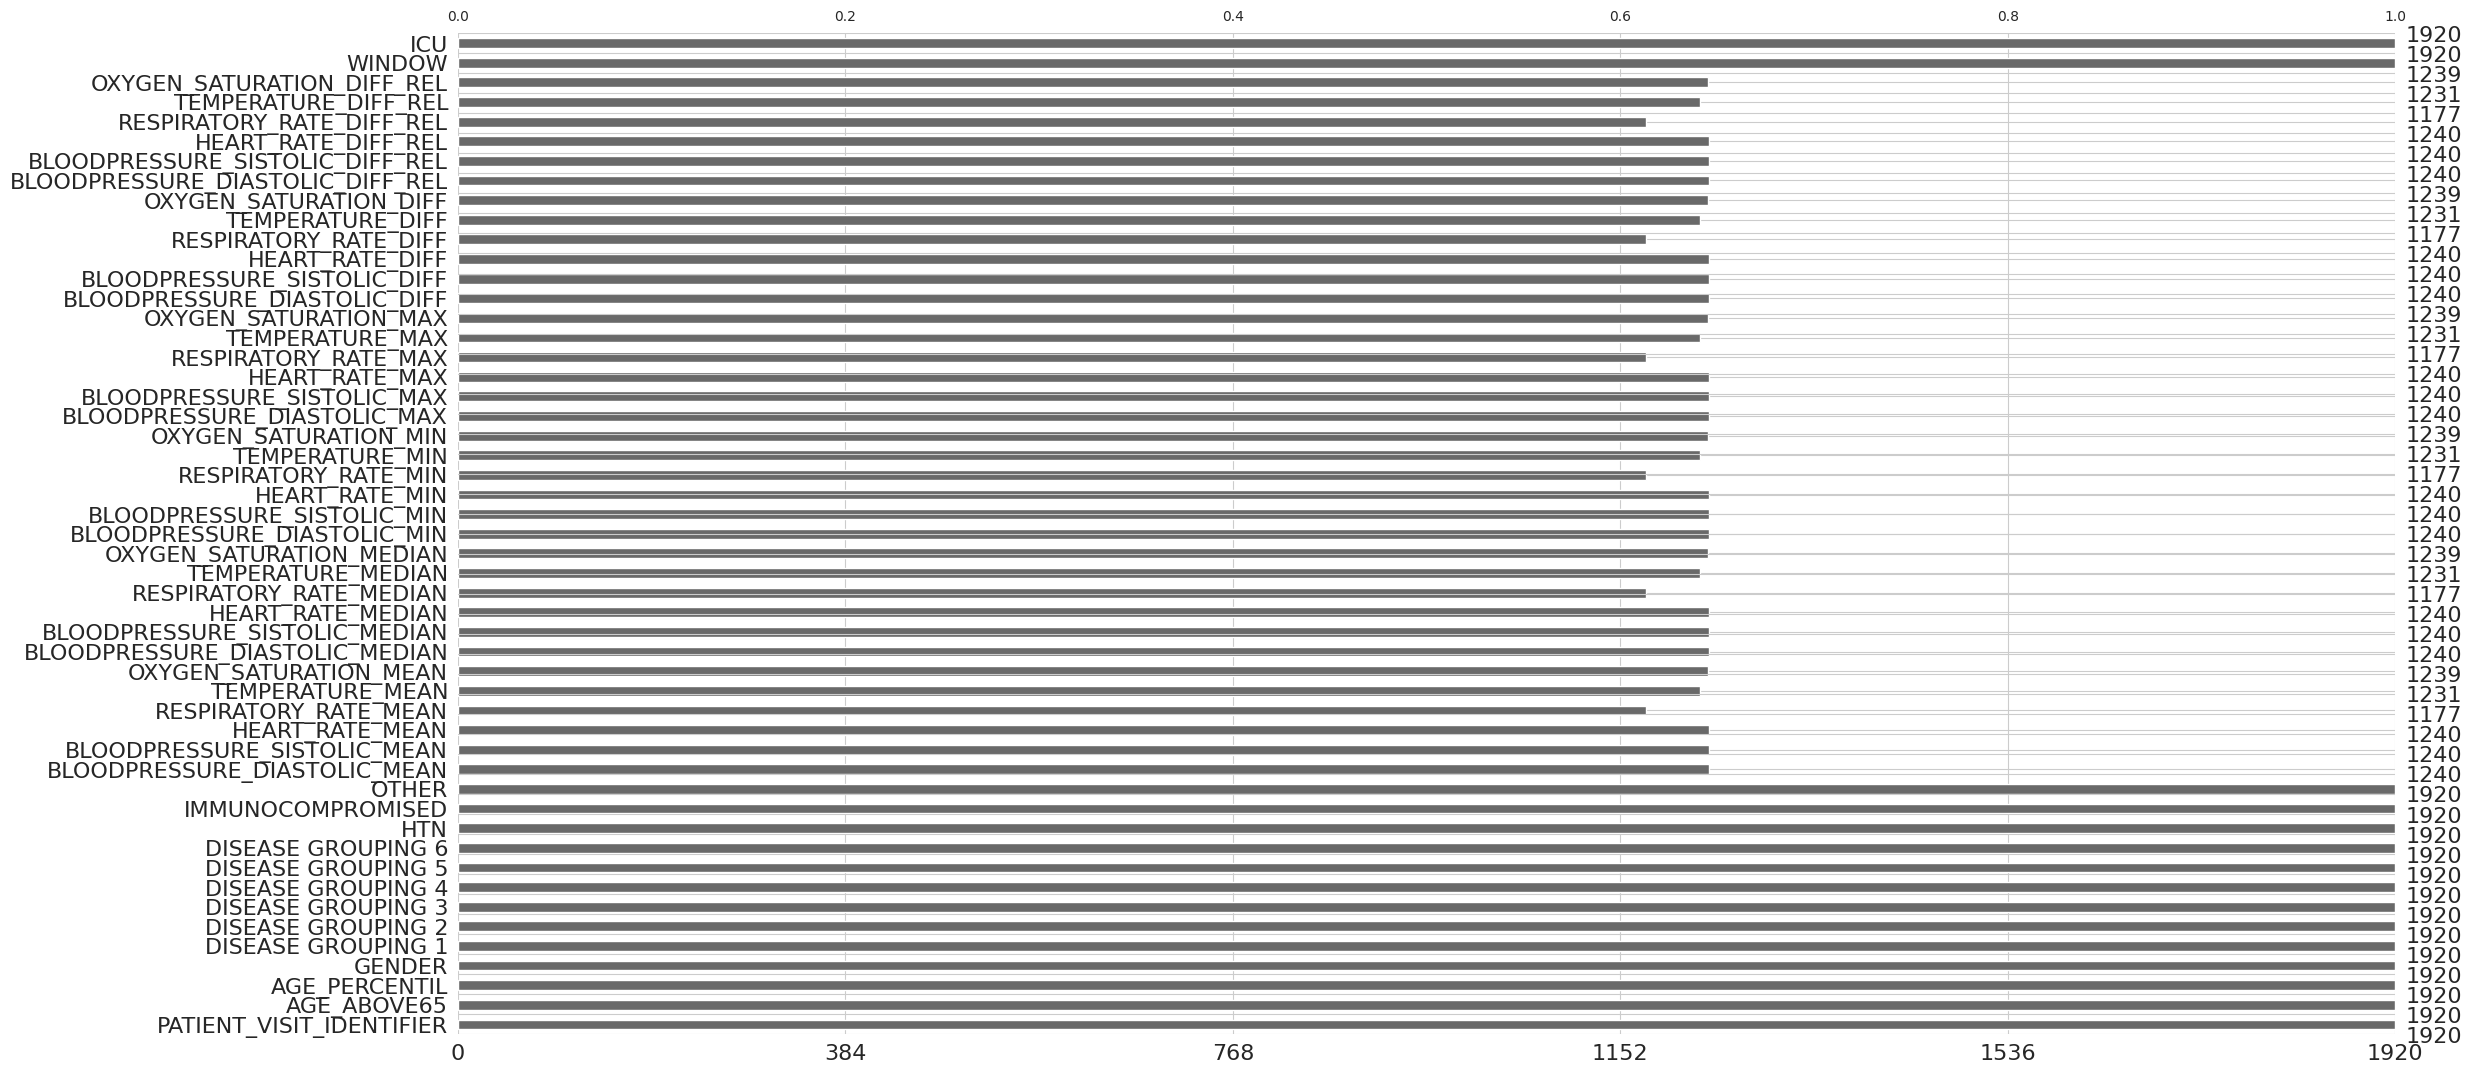

In [ ]:
msno.bar(data_clean)

##Data Imputation

In [ ]:
# impute function. takes data frame, column name, and patient id as arguments
def impute_locf_or_nocb(df, column_name, id):
  column = df[column_name]

  # find first and last non-NaN values for the column
  first_valid_index = column.first_valid_index()
  last_valid_index = column.last_valid_index()

  # Find the second valid index
  second_valid_index = column[column.index > first_valid_index].first_valid_index()

  # If there's no second valid index, default to the first valid index
  second_valid_index = second_valid_index if second_valid_index is not None else first_valid_index

  # Store the value at the second valid index
  second_index_value = column[second_valid_index]

  # patients 69, 84, 312, and 329 were causing issues. Seems like for some columns, they only had last value.
  if first_valid_index == last_valid_index:
    # try back fill first? Then front fill in case my logic is wrong
    df[column_name] = column.bfill().ffill()
    #Useful print statement for debugging
    #print(f'Patient id {id} has an issue at column {column_name} as {df[column_name][first_valid_index]} = {df[column_name][last_valid_index]}')
  else:
    for i in column.index:
      # Skip if the value is not null
      if not pd.isnull(column[i]):
        continue
      # if i is closer to first valid index, take that value
      if abs(i - first_valid_index) < abs(last_valid_index - i):
        df.loc[i, column_name] = column[first_valid_index]
      # if i is closer to last valid index, take that value
      elif abs(i - first_valid_index) > abs(last_valid_index - i):
        df.loc[i, column_name] = column[last_valid_index]
      # if it's in the middle, take the second valid index
      else:
        df.loc[i, column_name] = second_index_value

# collect array of all unique patient IDs
patient_ids = data_clean['PATIENT_VISIT_IDENTIFIER'].unique()
imputed_data_sets = []

for id in patient_ids:
  # create a mini data set just for that patient
  mini_df = data_clean[data_clean['PATIENT_VISIT_IDENTIFIER'] == id].copy()
  # find columns that need to be imputed for that patient
  percent_of_missing_data_in_each_column = mini_df.isnull().mean() * 100
  for column_name, percent in percent_of_missing_data_in_each_column.items():
    if percent > 10:
      impute_locf_or_nocb(mini_df, column_name, id)

  imputed_data_sets.append(mini_df)

# Reassemble the imputed datasets
imputed_full_df = pd.concat(imputed_data_sets)

# Replace data_clean with this imputed data
data_clean = imputed_full_df.copy()

# Display records so you can review the imputation method. Can display all 1920 if you need to debug
print(data_clean.head(5))

   PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65  AGE_PERCENTIL  GENDER  DISEASE GROUPING 1  DISEASE GROUPING 2  DISEASE GROUPING 3  DISEASE GROUPING 4  DISEASE GROUPING 5  DISEASE GROUPING 6  HTN  IMMUNOCOMPROMISED  OTHER  BLOODPRESSURE_DIASTOLIC_MEAN  BLOODPRESSURE_SISTOLIC_MEAN  HEART_RATE_MEAN  RESPIRATORY_RATE_MEAN  TEMPERATURE_MEAN  OXYGEN_SATURATION_MEAN  BLOODPRESSURE_DIASTOLIC_MEDIAN  BLOODPRESSURE_SISTOLIC_MEDIAN  HEART_RATE_MEDIAN  RESPIRATORY_RATE_MEDIAN  TEMPERATURE_MEDIAN  OXYGEN_SATURATION_MEDIAN  BLOODPRESSURE_DIASTOLIC_MIN  BLOODPRESSURE_SISTOLIC_MIN  HEART_RATE_MIN  RESPIRATORY_RATE_MIN  TEMPERATURE_MIN  OXYGEN_SATURATION_MIN  BLOODPRESSURE_DIASTOLIC_MAX  BLOODPRESSURE_SISTOLIC_MAX  HEART_RATE_MAX  RESPIRATORY_RATE_MAX  TEMPERATURE_MAX  OXYGEN_SATURATION_MAX  BLOODPRESSURE_DIASTOLIC_DIFF  BLOODPRESSURE_SISTOLIC_DIFF  HEART_RATE_DIFF  RESPIRATORY_RATE_DIFF  TEMPERATURE_DIFF  OXYGEN_SATURATION_DIFF  BLOODPRESSURE_DIASTOLIC_DIFF_REL  BLOODPRESSURE_SISTOLIC_DIFF_REL  HEART_RATE_D

<Axes: >

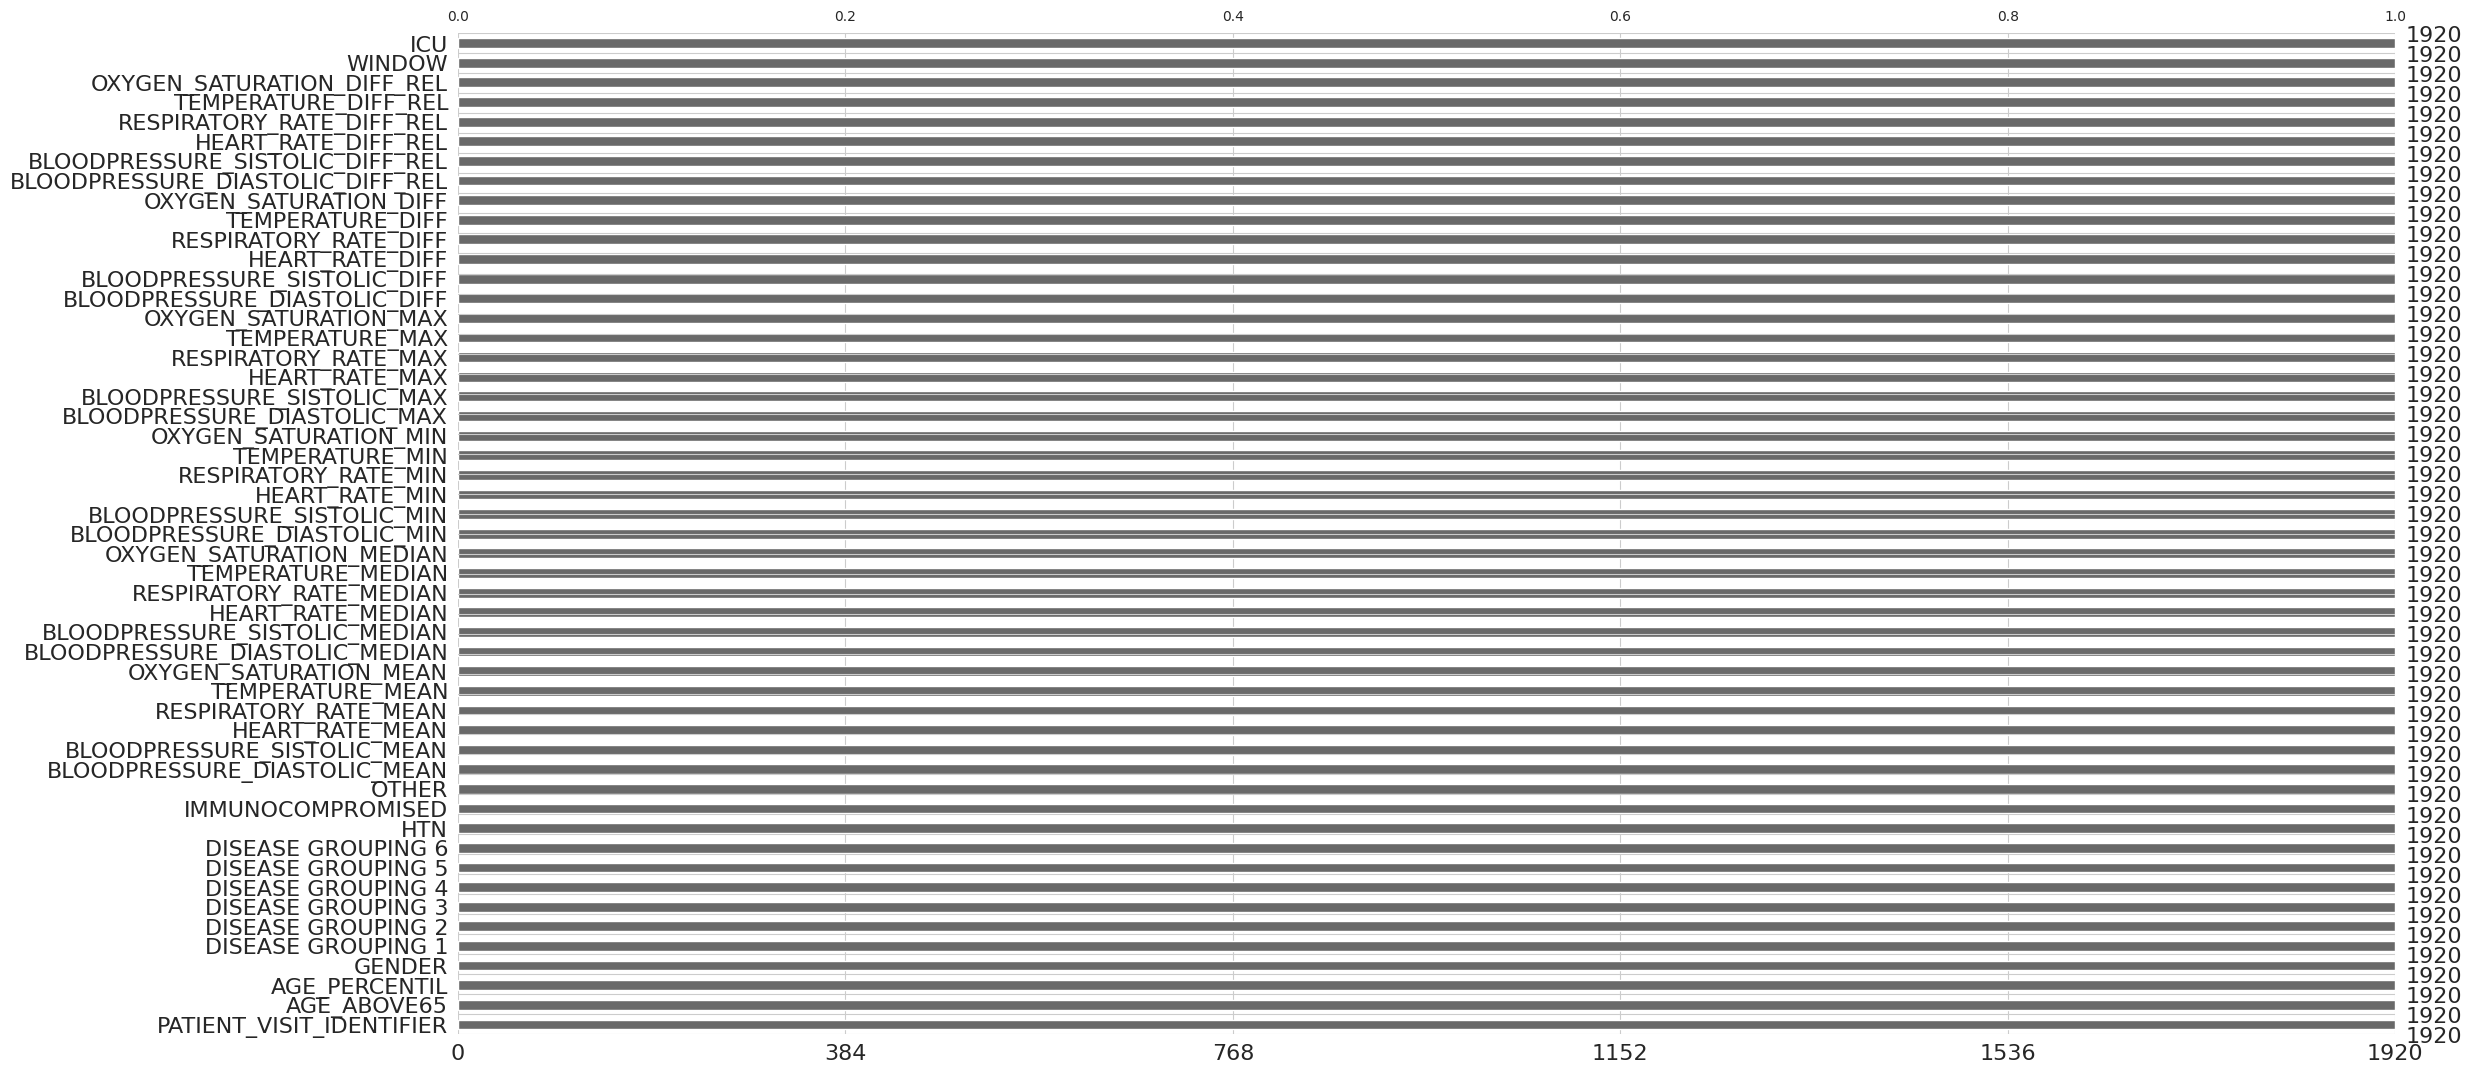

In [ ]:
# Check if this worked
msno.bar(data_clean)

##Remove Data After ICU Admission

Remove data for patients after admission to ICU as this data cannot be used for modeling (data leakage)

In [ ]:
# Before removing data after ICU admission
print(len(data_clean[data_clean['ICU']==1]))
print(len(data_clean[data_clean['ICU']==0]))

515
1405


In [ ]:
patient_ids = data_clean['PATIENT_VISIT_IDENTIFIER'].unique()
data_sets_with_icu_admissions_removed = []

for id in patient_ids:
  mini_df = data_clean[data_clean['PATIENT_VISIT_IDENTIFIER'] == id].copy()
  icu_admission_index = mini_df[mini_df['ICU'] == 1].index
  if not icu_admission_index.empty:
    first_icu_admission_index = icu_admission_index[0]
    rows_to_remove = mini_df[mini_df.index > first_icu_admission_index].index
    mini_df = mini_df.drop(rows_to_remove)

  data_sets_with_icu_admissions_removed.append(mini_df)

# Reassemble the imputed datasets
icu_adjusted_df = pd.concat(data_sets_with_icu_admissions_removed)

# Replace data_clean with this imputed data
data_clean = icu_adjusted_df.copy()

In [ ]:
# Can more easily see that this worked from tail end of data
print(data_clean.tail(10))

      PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65  AGE_PERCENTIL  GENDER  DISEASE GROUPING 1  DISEASE GROUPING 2  DISEASE GROUPING 3  DISEASE GROUPING 4  DISEASE GROUPING 5  DISEASE GROUPING 6  HTN  IMMUNOCOMPROMISED  OTHER  BLOODPRESSURE_DIASTOLIC_MEAN  BLOODPRESSURE_SISTOLIC_MEAN  HEART_RATE_MEAN  RESPIRATORY_RATE_MEAN  TEMPERATURE_MEAN  OXYGEN_SATURATION_MEAN  BLOODPRESSURE_DIASTOLIC_MEDIAN  BLOODPRESSURE_SISTOLIC_MEDIAN  HEART_RATE_MEDIAN  RESPIRATORY_RATE_MEDIAN  TEMPERATURE_MEDIAN  OXYGEN_SATURATION_MEDIAN  BLOODPRESSURE_DIASTOLIC_MIN  BLOODPRESSURE_SISTOLIC_MIN  HEART_RATE_MIN  RESPIRATORY_RATE_MIN  TEMPERATURE_MIN  OXYGEN_SATURATION_MIN  BLOODPRESSURE_DIASTOLIC_MAX  BLOODPRESSURE_SISTOLIC_MAX  HEART_RATE_MAX  RESPIRATORY_RATE_MAX  TEMPERATURE_MAX  OXYGEN_SATURATION_MAX  BLOODPRESSURE_DIASTOLIC_DIFF  BLOODPRESSURE_SISTOLIC_DIFF  HEART_RATE_DIFF  RESPIRATORY_RATE_DIFF  TEMPERATURE_DIFF  OXYGEN_SATURATION_DIFF  BLOODPRESSURE_DIASTOLIC_DIFF_REL  BLOODPRESSURE_SISTOLIC_DIFF_REL  HEART_RAT

In [ ]:
# After removing data after ICU admission
print(len(data_clean[data_clean['ICU']==1]))
print(len(data_clean[data_clean['ICU']==0]))

195
1405


##Split data into train and test data sets and balance ICU bias

In [ ]:
# Split the data into training and testing sets
random_seed = 10
train_data, test_data = train_test_split(data_clean, test_size=0.2, random_state=random_seed)

In [ ]:
# Before balancing bias in ICU admission
print(len(train_data[train_data['ICU']==1]))
print(len(train_data[train_data['ICU']==0]))

152
1128


In [ ]:
# get list of column names
column_names = train_data.columns.tolist()

# Balance bias in ICU admission
featuresMatrix = train_data[train_data.columns[:-1]].values
targetVector = train_data[train_data.columns[-1]].values

ros = RandomOverSampler()

featuresMatrix, targetVector = ros.fit_resample(featuresMatrix, targetVector)
train_data_array = np.hstack((featuresMatrix, np.reshape(targetVector, (-1, 1))))

train_data = pd.DataFrame(train_data_array, columns=column_names)

In [ ]:
# After balancing bias in ICU admission
print(len(train_data[train_data['ICU']==1]))
print(len(train_data[train_data['ICU']==0]))

1128
1128


In [ ]:
# Saving features matrix (X) and target vector (y) in variables
trainDataFeaturesMatrix = train_data[train_data.columns[:-1]].values
trainDataTargetVector = train_data[train_data.columns[-1]].values

testDataFeaturesMatrix = test_data[train_data.columns[:-1]].values
testDataTargetVector = test_data[train_data.columns[-1]].values

In [ ]:
# Save the training and testing DataFrames to CSV files
train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)

#Step 3 - Implement Machine Learning Models


##k-nearest neighbors

In [ ]:
from sklearn.linear_model import LogisticRegression
knn_model = LogisticRegression(random_state=42,)
knn_model.fit(trainDataFeaturesMatrix, trainDataTargetVector)

InvalidParameterError: The 'penalty' parameter of LogisticRegression must be a str among {'l2', 'elasticnet', 'l1', 'none' (deprecated)} or None. Got 'l' instead.

In [ ]:
y_pred1 = knn_model.predict(testDataFeaturesMatrix)
count = 0


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
def model_metrics(trainDataTargetVector, y_pred1):
  tn, fp, fn, tp = confusion_matrix(trainDataTargetVector, y_pred1).ravel()
  specificity = tn/(tn+fp)
  sensitivity=tp/(tp+fn)
  print("Sensitivity:",sensitivity*100)
  print("Specificity:",specificity*100)
  print("ROC_AUC_Score:",roc_auc_score(trainDataTargetVector, y_pred1)*100)
accuracy = accuracy_score(testDataTargetVector, y_pred1)
print(f'Accuracy score for KNeighbours Classifier - ',accuracy*100,'Percent')
print(classification_report(testDataTargetVector, y_pred1))
model_metrics(testDataTargetVector, y_pred1)

Accuracy score for KNeighbours Classifier -  80.3125 Percent
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       277
           1       0.17      0.12      0.14        43

    accuracy                           0.80       320
   macro avg       0.52      0.51      0.51       320
weighted avg       0.77      0.80      0.79       320

Sensitivity: 11.627906976744185
Specificity: 90.97472924187726
ROC_AUC_Score: 51.30131810931072


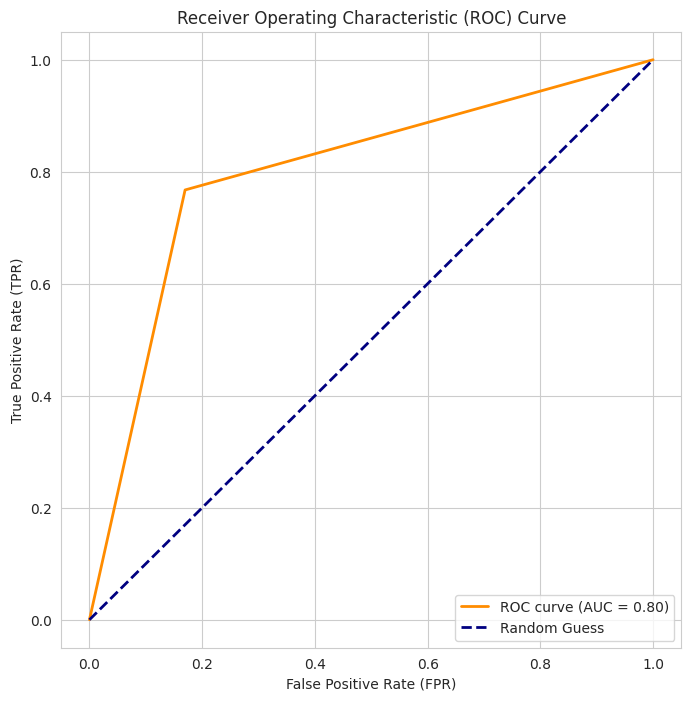

In [ ]:
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area under the curve (AUC)
fpr, tpr, thresholds = roc_curve(testDataTargetVector, y_pred1)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

##Random Forest

In [ ]:
rf_model = RandomForestClassifier(criterion='entropy',random_state=24,max_depth=9,max_leaf_nodes=20,
                                  bootstrap=True,min_samples_split=4)
rf_model.fit(trainDataFeaturesMatrix, trainDataTargetVector)

RandomForestClassifier(criterion='entropy', max_depth=9, max_leaf_nodes=20,
                       min_samples_split=4, random_state=24)

In [ ]:
y_pred2 = rf_model.predict(testDataFeaturesMatrix)


In [ ]:
accuracy = accuracy_score(testDataTargetVector, y_pred2)
print(f'Accuracy score for Random Forest - ',accuracy*100,'Percent')
print(classification_report(testDataTargetVector, y_pred2))
model_metrics(testDataTargetVector, y_pred2)

Accuracy score for Random Forest -  87.1875 Percent
              precision    recall  f1-score   support

           0       0.96      0.88      0.92       277
           1       0.52      0.79      0.62        43

    accuracy                           0.87       320
   macro avg       0.74      0.84      0.77       320
weighted avg       0.90      0.87      0.88       320

Sensitivity: 79.06976744186046
Specificity: 88.4476534296029
ROC_AUC_Score: 83.75871043573169


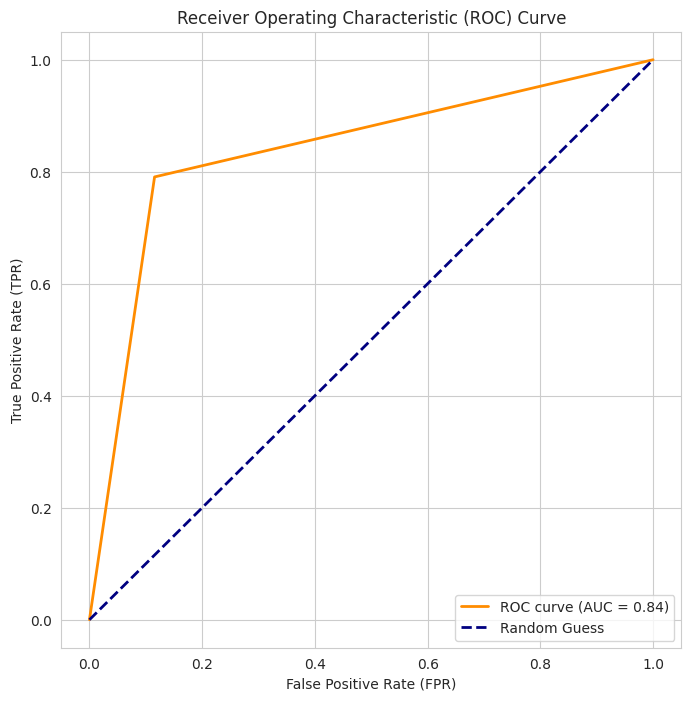

In [ ]:
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area under the curve (AUC)
fpr, tpr, thresholds = roc_curve(testDataTargetVector, y_pred2)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

##Support Vector Machine

In [ ]:
svm_model = make_pipeline(svm.SVC(kernel='poly',degree=2,tol = 0.005,
                                  decision_function_shape='ovr',gamma=0.5,C=1))
svm_model.fit(trainDataFeaturesMatrix, trainDataTargetVector)

In [ ]:
y_pred3 = svm_model.predict(testDataFeaturesMatrix)

In [ ]:
accuracy = accuracy_score(testDataTargetVector, y_pred3)
print(f'Accuracy score for SVM - ',accuracy*100,'Percent')
print(classification_report(testDataTargetVector, y_pred3))
model_metrics(testDataTargetVector, y_pred3)

#Step 4 - AI Fairness 360 Toolkit Implementation

In [ ]:
print(f"Number of Rows: {data_clean.shape[0]}")
print(f"Number of Columns: {data_clean.shape[1]}")

In [ ]:
print(f"Number of Rows: {train_data.shape[0]}")
print(f"Number of Columns: {train_data.shape[1]}")

In [ ]:
print(f"Number of Rows: {test_data.shape[0]}")
print(f"Number of Columns: {test_data.shape[1]}")

##Identify imbalances

In [ ]:
# Set styling for plots
sns.set_style('white')
sns.set(font_scale=1)

genderCounts = train_data.GENDER.value_counts()
print(genderCounts)
print("- - - - - - - - - - - - - - -")
ageAboveCounts = train_data.AGE_ABOVE65.value_counts()
print(ageAboveCounts)
print("- - - - - - - - - - - - - - -")
agePercentilCounts = train_data.AGE_PERCENTIL.value_counts()
print(agePercentilCounts)



# New figure instance
plt.figure()
# Fill new figure instance with data
sns.countplot(x = 'GENDER', data = train_data, palette = 'nipy_spectral', width = 0.3)


# New figure instance
plt.figure()
# Fill new figure instance with data
sns.countplot(x = 'AGE_ABOVE65', data = train_data, palette = 'nipy_spectral', width = 0.3)

# New figure instance
plt.figure()
# Fill new figure instance with data
sns.countplot(x = 'AGE_PERCENTIL', data = train_data, palette = 'nipy_spectral', width = 0.3)

##Remove Imbalances

In [ ]:
from imblearn.over_sampling import RandomOverSampler

print(f"Before performing over-sampling on the GENDER column, we have {train_data.shape[0]} rows")

# Oversample gender to balance
ros = RandomOverSampler(random_state=0)
x_resampled, y_resampled = ros.fit_resample(train_data, train_data.GENDER)

print(f"After performing over-sampling on the GENDER column, we have {x_resampled.shape[0]} rows")

balancedGenderCounts = y_resampled.value_counts()
print(balancedGenderCounts)

plt.figure()
sns.countplot(x = y_resampled, palette='nipy_spectral', width=0.3)

##Identify Biases

In [ ]:
import aif360
from aif360.datasets import StandardDataset
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.algorithms.preprocessing import Reweighing

In [ ]:
# Identifying biases
# INSERT BRIEF EXPLANATION HERE
biasedDatasetOfGender = StandardDataset(              #Creating dataset of gender from original dataset that is preassumaly biased
    df=data_clean,
    label_name='GENDER',
    favorable_classes=[1],
    protected_attribute_names= ['ICU'],
    privileged_classes=[[1]]
)


In [ ]:
classifier = RandomForestClassifier(random_state=42)
X_train = data_clean['GENDER'].values
y_train = data_clean['ICU'].ravel()
classifier.fit(X_train.reshape(-1, 1), y_train)



In [ ]:
# Make predictions on the test set
X_test = data_clean['GENDER'].values
y_pred = classifier.predict(X_test.reshape(-1, 1))
count = 0
for i in data_clean.ICU:
  if i == 1:
    count = count+1
print(count)



In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
from aif360.datasets import StandardDataset
from aif360.algorithms.preprocessing import Reweighing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report

disparate_impact_value_before = mean_absolute_percentage_error(data_clean.GENDER, y_pred)
print(f'Disparate Impact before removing bias: {disparate_impact_value_before}')

# Assuming you have already loaded your dataset into a StandardDataset named 'dataset'

df = biasedDatasetOfGender.convert_to_dataframe()[0]

# Split the dataset into training and testing sets
privileged_groups = [{'GENDER': 1}]  # Specify the privileged group based on the protected attribute
unprivileged_groups = [{'GENDER': 0}]  # Specify the unprivileged group based on the protected attribute
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)


In [ ]:
# Evaluate the accuracy
accuracy = accuracy_score(y_resampled[0:1600], y_pred)
print(f'Accuracy: {accuracy}')
print("Classification Report:\n", classification_report(y_resampled[1300:2900], y_pred))



In [ ]:
from aif360.datasets import BinaryLabelDataset
from aif360.algorithms.preprocessing import Reweighing

# Assuming 'data_clean' is your dataset and 'GENDER' is the protected attribute
dataset = BinaryLabelDataset(df=data_clean, label_names=['ICU'], protected_attribute_names=['GENDER'], favorable_label=1, unfavorable_label=0)

# Define unprivileged and privileged groups
unprivileged_groups = [{'GENDER': 0}]  # Replace with the actual values for the unprivileged group
privileged_groups = [{'GENDER': 1}]    # Replace with the actual values for the privileged group

# Apply reweighing to mitigate bias
RW = Reweighing(unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
RW.fit(dataset)
train_dataset_rw = RW.transform(dataset)



In [ ]:
# Assuming 'dataset' is your BinaryLabelDataset
# Extract features, labels, and protected attributes
features = dataset.features
labels = dataset.labels.ravel()
protected_attributes = dataset.protected_attributes

# Create a DataFrame with extracted information
data_1 = pd.DataFrame(features, columns=dataset.feature_names)
data_1['labels'] = labels
data_1['protected_attribute'] = protected_attributes

# Now 'data_1' is a Pandas DataFrame containing features, labels, and protected attributes


In [ ]:
#data_1.head(10)
#labels.tolist()

In [ ]:
# Evaluate the accuracy after reweighing
X_train_rw = train_dataset_rw.labels
y_train_rw = train_dataset_rw.labels.ravel()
classifier.fit(X_train_rw, y_train_rw)
y_pred_rw = classifier.predict(X_test.reshape(-1, 1))
accuracy_rw = accuracy_score(data_clean.GENDER,y_pred_rw)
print(f'Accuracy after reweighing: {accuracy_rw}')



In [ ]:
# Calculate disparate impact without AIF360
disparate_impact_value = mean_absolute_percentage_error(data_clean.GENDER, y_train)
print(f'Disparate Impact: {disparate_impact_value}')

In [ ]:
# Calculate disparate impact after AIF360
disparate_impact_value = mean_absolute_percentage_error(data_clean.GENDER, y_pred_rw)
print(f'Disparate Impact: {disparate_impact_value}')

In [ ]:
# Evaluate the accuracy before AIF360
accuracy = accuracy_score(data_clean.GENDER, y_train)
print(f'Accuracy: {accuracy}')
print("Classification Report:\n", classification_report(data_clean.GENDER, y_train))

In [ ]:
# Evaluate the accuracy after AIF360
accuracy = accuracy_score(data_clean.GENDER, y_pred_rw)
print(f'Accuracy: {accuracy}')
print("Classification Report:\n", classification_report(data_clean.GENDER, y_pred_rw))